In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import requests

In [78]:
data = pd.read_csv('data_files/final_dataset.csv', encoding ='latin-1')
data.head(5)

First Name  Last Name  Age         Wages Nationality    Position  Height   
0  Oleksandr  Zinchenko   27   Â£7,800,000     Ukraine    Defender  175 cm  \
1     Thomas     Partey   30  Â£10,400,000       Ghana  Midfielder  185 cm   
2        Kai    Havertz   24   Â£7,800,000     Germany  Midfielder  193 cm   
3     Bukayo       Saka   22   Â£3,640,000     England    Attacker  178 cm   
4    Leandro   Trossard   29   Â£2,340,000     Belgium    Attacker  172 cm   

  Weight Team Name          League  ...  Fouls Drawn  Fouls Committed   
0  64 kg   Arsenal  Premier League  ...           11               15  \
1  77 kg   Arsenal  Premier League  ...           23               37   
2  83 kg   Arsenal  Premier League  ...            0               60   
3  72 kg   Arsenal  Premier League  ...           25               43   
4  61 kg   Arsenal  Premier League  ...           17                9   

   Yellow Cards  Red Cards  Penalties Won  Penalties Committed   
0             3          0              0                    0  \
1             5          0              0                    0   
2             5          0              0                    0   
3             6          0              0                    0   
4             0          0              0                    0   

   Penalties Scored  Penalties Missed  Penalties Saved            Full Name  
0                 0                 0                0  Oleksandr Zinchenko  
1                 0                 0                0        Thomas Partey  
2                 1                 0                0         Kai  Havertz  
3                 2                 0                0         Bukayo  Saka  
4                 0                 0                0     Leandro Trossard  

[5 rows x 46 columns]

# Exploratory data analysis and Feature Engineering on the final dataset

In [79]:
# Final number of values in our dataset
print(f"The number of observations in the final dataset are {data.shape[0]}")

The number of observations in the final dataset are 381


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   First Name           381 non-null    object 
 1   Last Name            381 non-null    object 
 2   Age                  381 non-null    int64  
 3   Wages                381 non-null    object 
 4   Nationality          381 non-null    object 
 5   Position             381 non-null    object 
 6   Height               381 non-null    object 
 7   Weight               381 non-null    object 
 8   Team Name            381 non-null    object 
 9   League               381 non-null    object 
 10  Appearances          381 non-null    int64  
 11  Lineups              381 non-null    int64  
 12  Minutes              381 non-null    int64  
 13  Number               381 non-null    int64  
 14  Rating               381 non-null    float64
 15  Captain              381 non-null    int

In [81]:
#Checking to see if there are any missing values left
print(data.isnull().sum())

First Name             0
Last Name              0
Age                    0
Wages                  0
Nationality            0
Position               0
Height                 0
Weight                 0
Team Name              0
League                 0
Appearances            0
Lineups                0
Minutes                0
Number                 0
Rating                 0
Captain                0
In                     0
Out                    0
Bench                  0
Total Shots            0
On Target Shots        0
Total Goals            0
Conceded Goals         0
Assists                0
Saves                  0
Total Passes           0
Key Passes             0
Pass Accuracy          0
Total Tackles          0
Blocks                 0
Interceptions          0
Total Duels            0
Duels Won              0
Dribble Attempts       0
Dribble Success        0
Past Dribbles          0
Fouls Drawn            0
Fouls Committed        0
Yellow Cards           0
Red Cards              0


We have to convert our target variable column into integer format

In [82]:
# Remove the pound sign
data['Wages'] = data['Wages'].str.replace('£','')

#Remove the other sign
data['Wages'] = data['Wages'].str.replace('Â','')

# Convert to integer
data['Wages'] = data['Wages'].str.replace(',', '').astype(int)

In [83]:
data.describe()

Age         Wages  Appearances     Lineups      Minutes  Number   
count  381.000000  3.810000e+02   381.000000  381.000000   381.000000   381.0  \
mean    27.304462  3.759412e+06    22.094488   16.461942  1703.330709     0.0   
std      4.166496  3.355132e+06    11.205567   11.621973   882.782372     0.0   
min     19.000000  4.160000e+04     0.000000    0.000000   305.000000     0.0   
25%     24.000000  1.560000e+06    15.000000    7.000000   967.000000     0.0   
50%     27.000000  2.860000e+06    23.000000   14.000000  1604.000000     0.0   
75%     30.000000  5.200000e+06    32.000000   26.000000  2386.000000     0.0   
max     40.000000  2.080000e+07    38.000000   38.000000  3420.000000     0.0   

           Rating  Captain          In         Out  ...  Past Dribbles   
count  381.000000    381.0  381.000000  381.000000  ...          381.0  \
mean     6.409730      0.0    5.314961    5.874016  ...            0.0   
std      1.604947      0.0    5.534629    5.489213  ...            0.0   
min      0.000000      0.0    0.000000    0.000000  ...            0.0   
25%      6.609090      0.0    1.000000    1.000000  ...            0.0   
50%      6.750000      0.0    4.000000    4.000000  ...            0.0   
75%      6.916000      0.0    8.000000   10.000000  ...            0.0   
max      7.800000      0.0   27.000000   27.000000  ...            0.0   

       Fouls Drawn  Fouls Committed  Yellow Cards   Red Cards  Penalties Won   
count   381.000000       381.000000    381.000000  381.000000          381.0  \
mean     15.013123        16.202100      2.716535    0.031496            0.0   
std      14.525924        12.947204      2.542991    0.189334            0.0   
min       0.000000         0.000000      0.000000    0.000000            0.0   
25%       4.000000         6.000000      1.000000    0.000000            0.0   
50%      11.000000        14.000000      2.000000    0.000000            0.0   
75%      22.000000        24.000000      4.000000    0.000000            0.0   
max      83.000000        65.000000     14.000000    2.000000            0.0   

       Penalties Committed  Penalties Scored  Penalties Missed   
count                381.0        381.000000        381.000000  \
mean                   0.0          0.167979          0.041995   
std                    0.0          0.720470          0.287128   
min                    0.0          0.000000          0.000000   
25%                    0.0          0.000000          0.000000   
50%                    0.0          0.000000          0.000000   
75%                    0.0          0.000000          0.000000   
max                    0.0          7.000000          4.000000   

       Penalties Saved  
count       381.000000  
mean          0.068241  
std           0.384659  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           0.000000  
max           3.000000  

[8 rows x 37 columns]

In [84]:
print(f"The highest wage a player is earning yearly is : {max(data['Wages'])}")
print(f"The lowest wage a player is earning yearly is : {min(data['Wages'])}")

The highest wage a player is earning yearly is : 20800000
The lowest wage a player is earning yearly is : 41600


Visualize Data Distribution for Numerical Columns

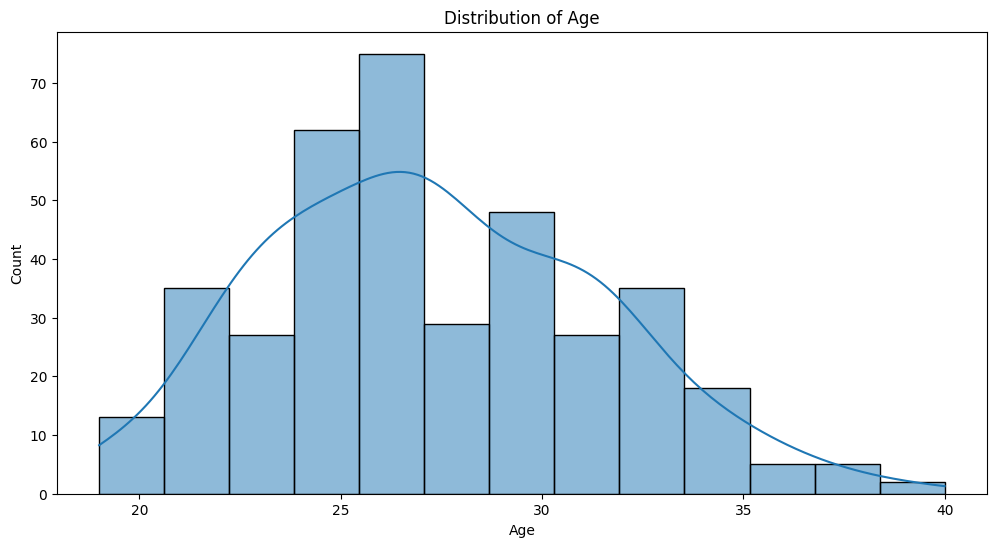

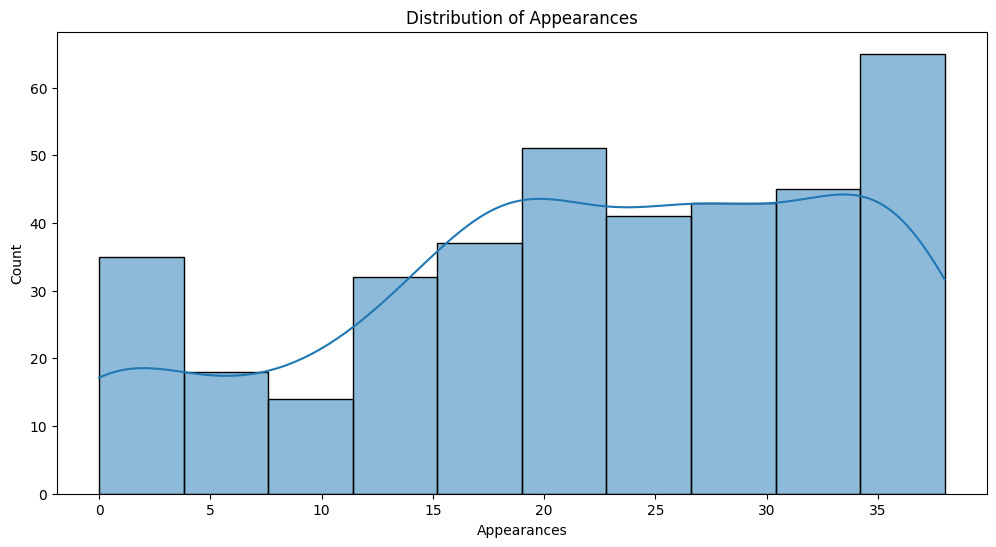

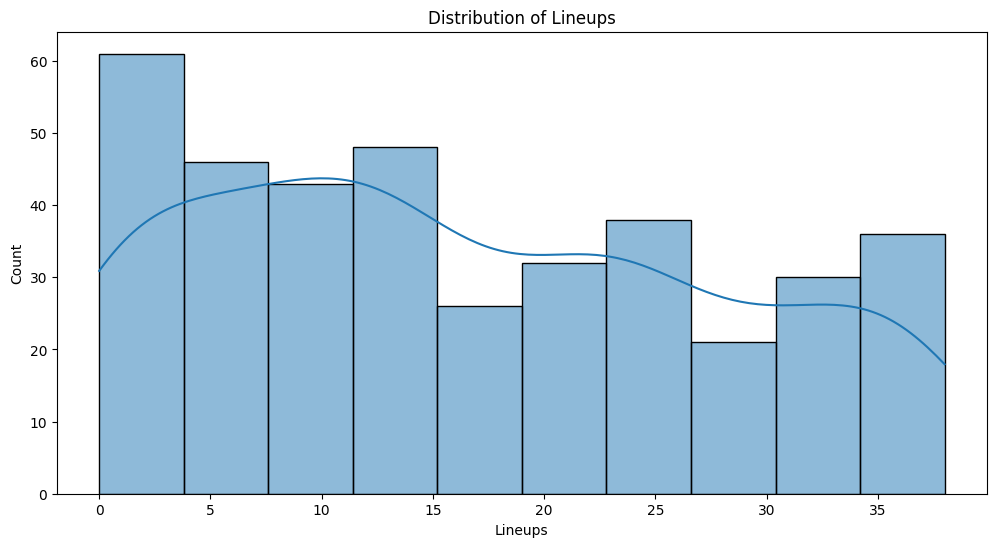

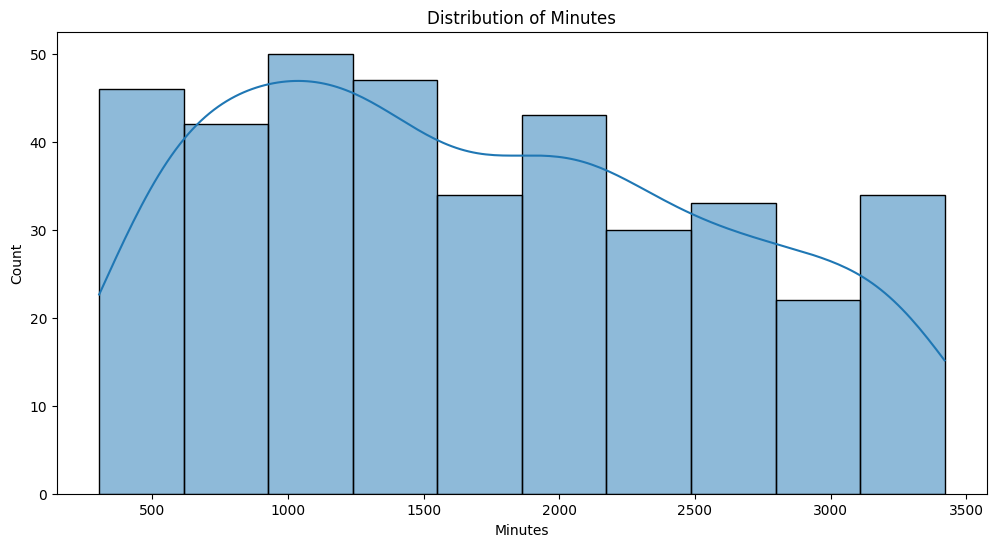

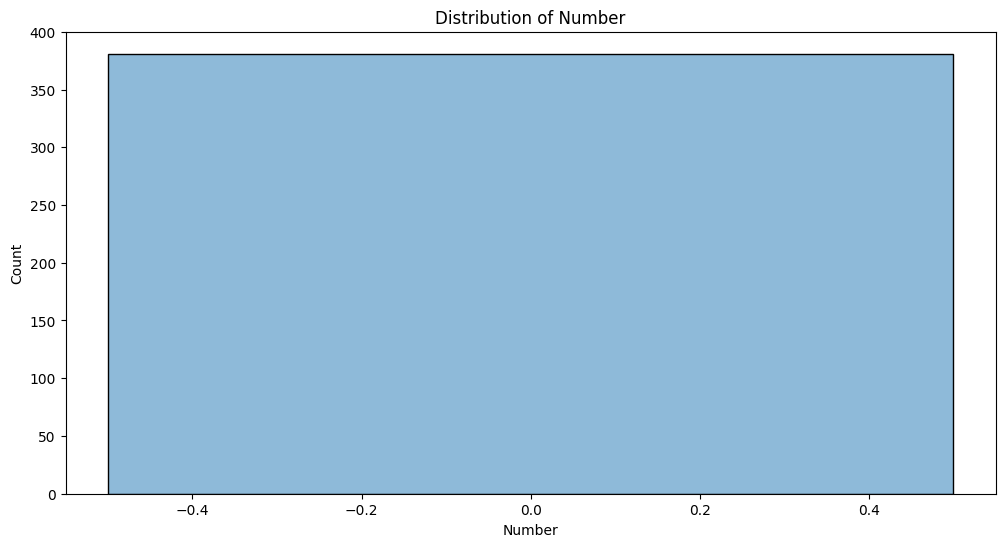

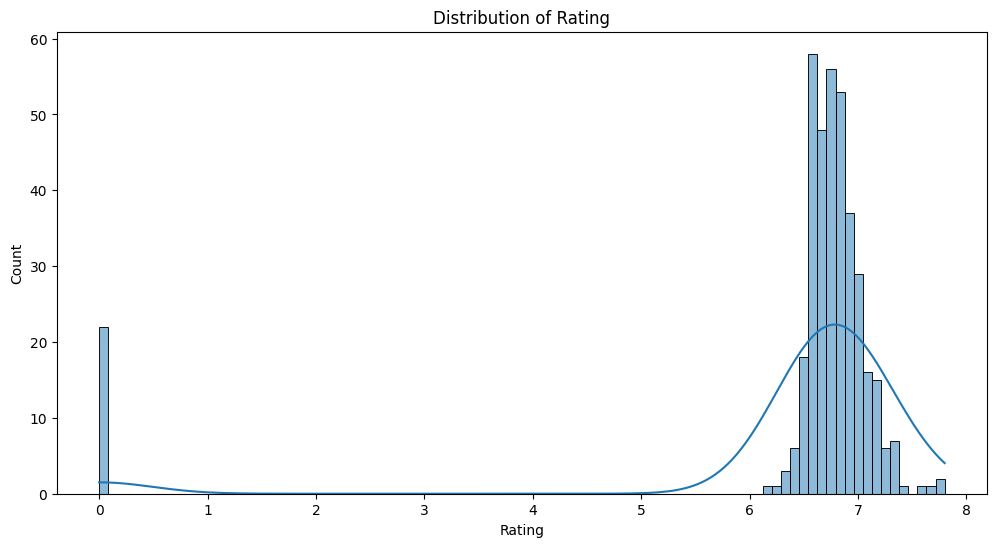

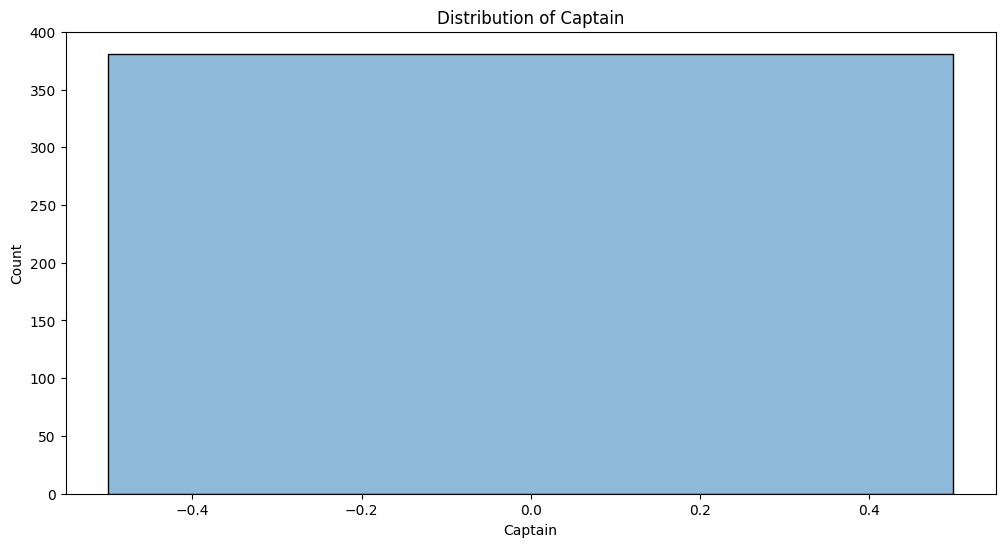

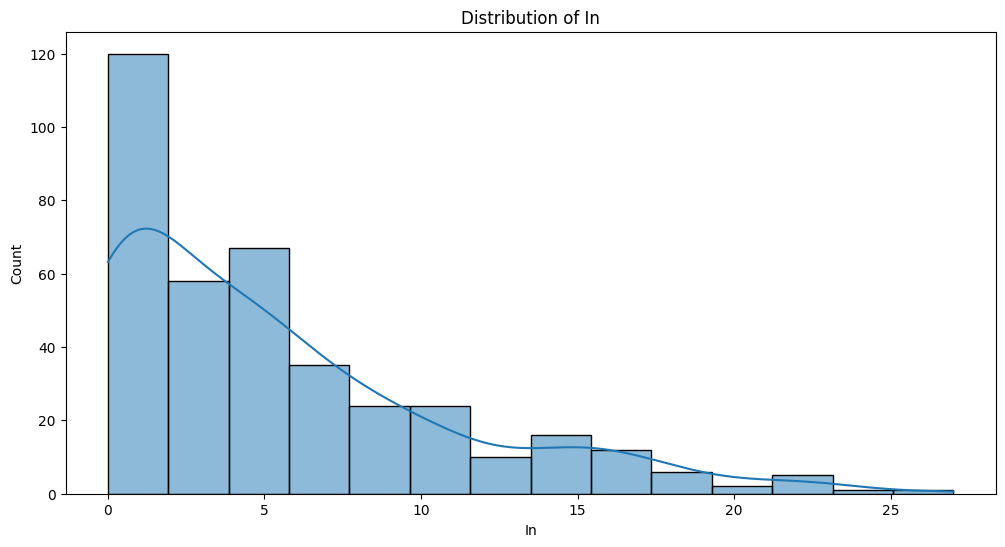

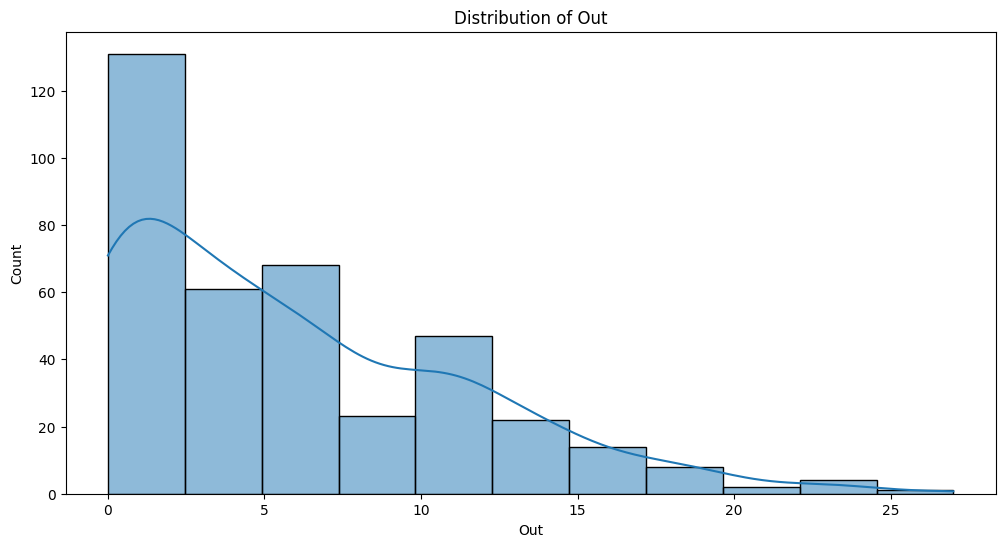

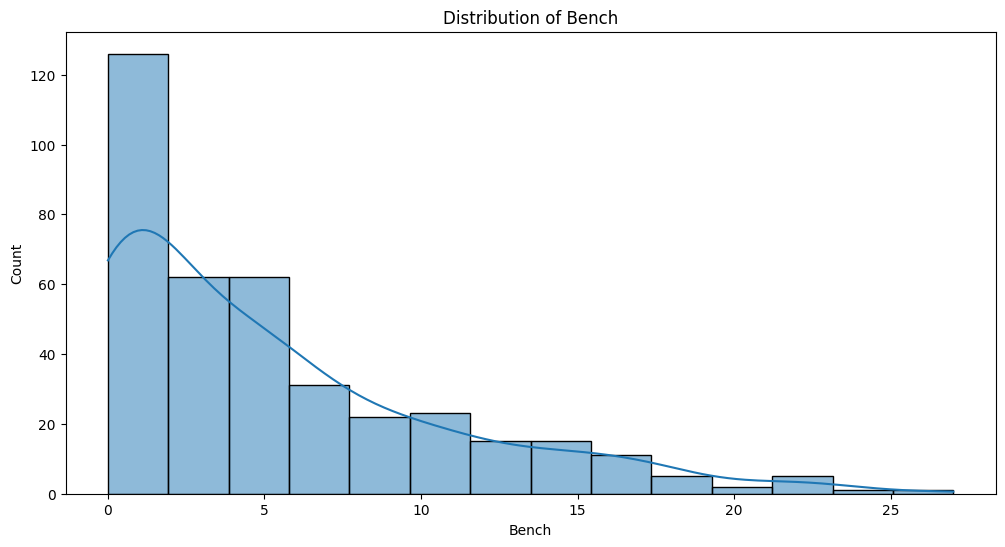

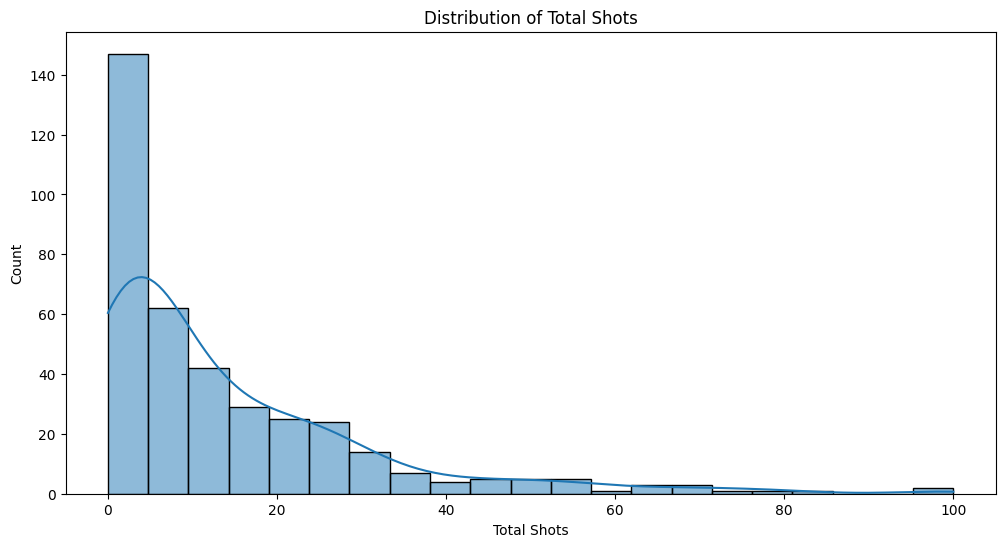

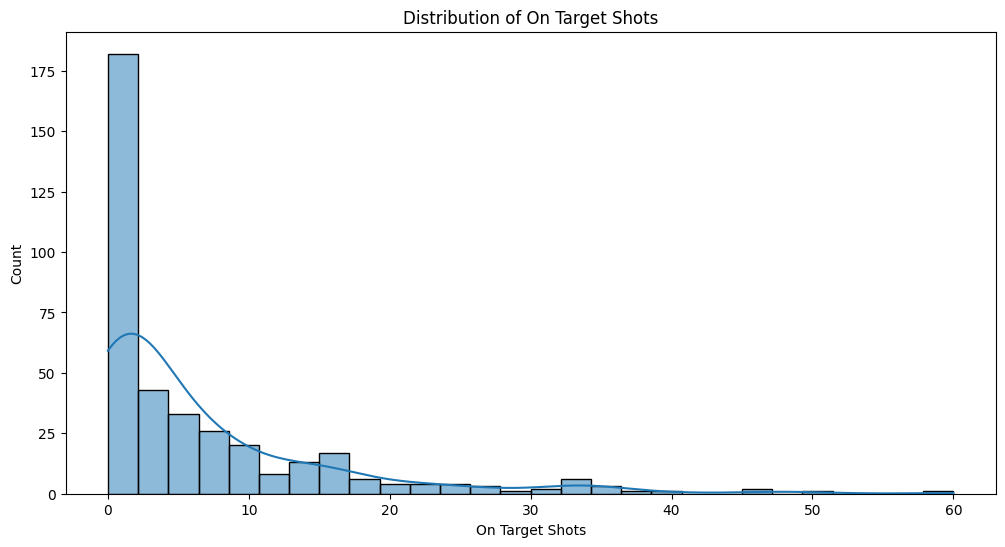

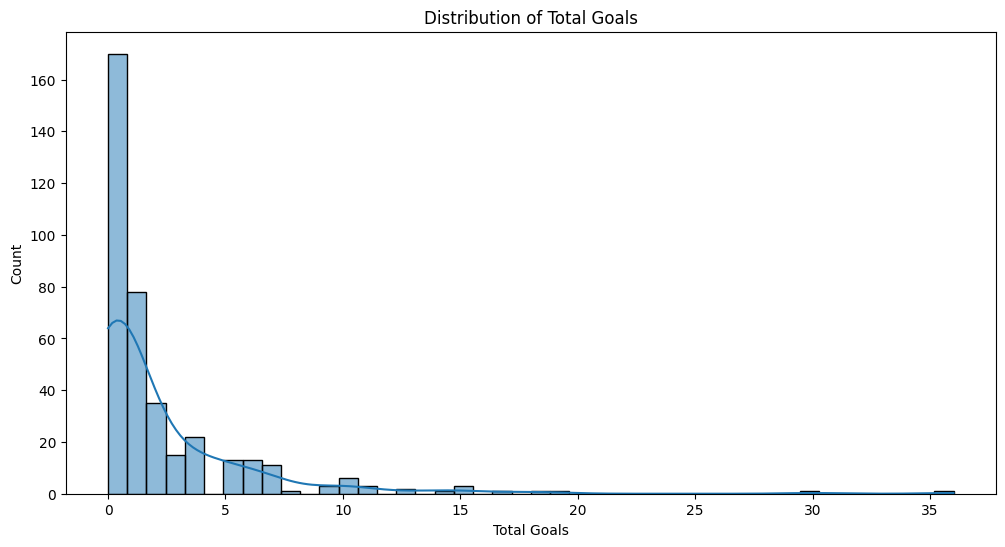

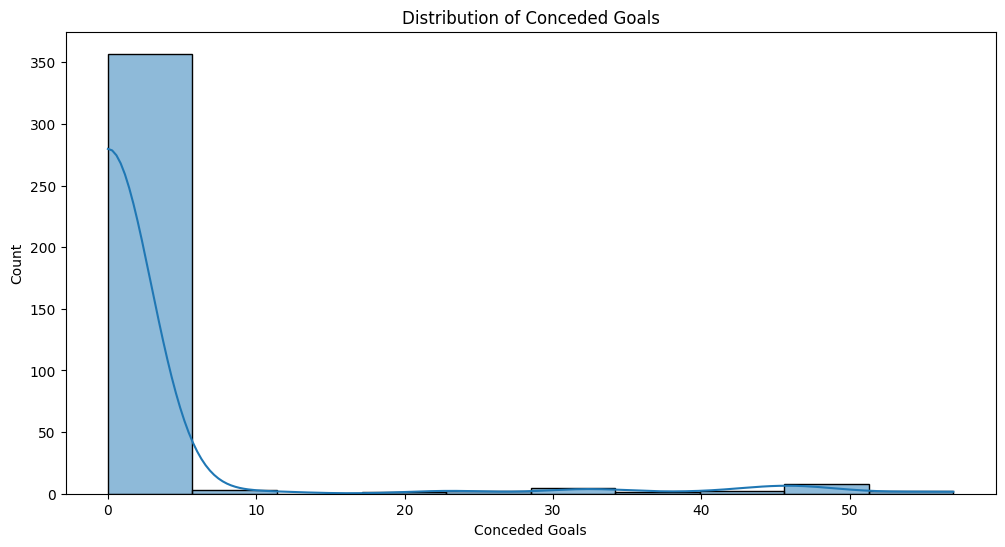

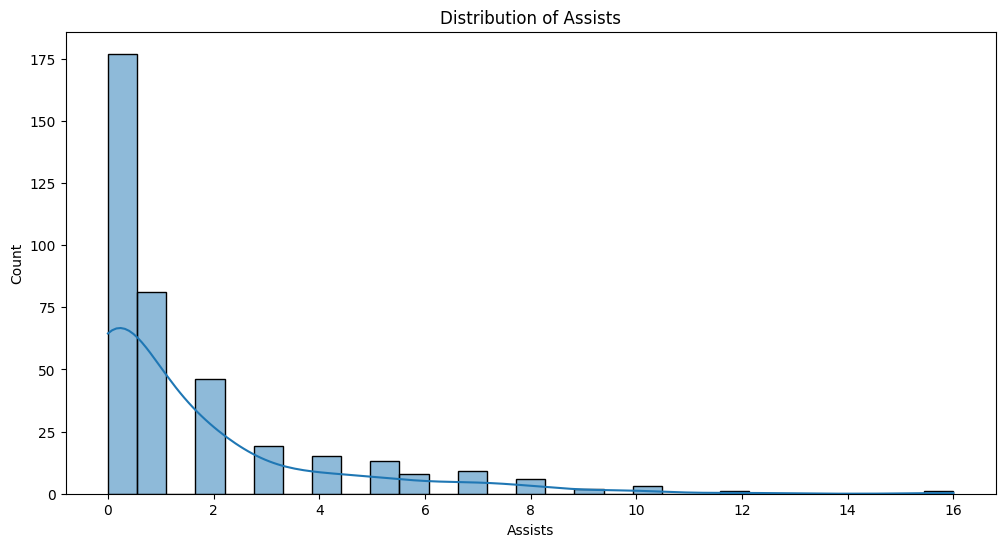

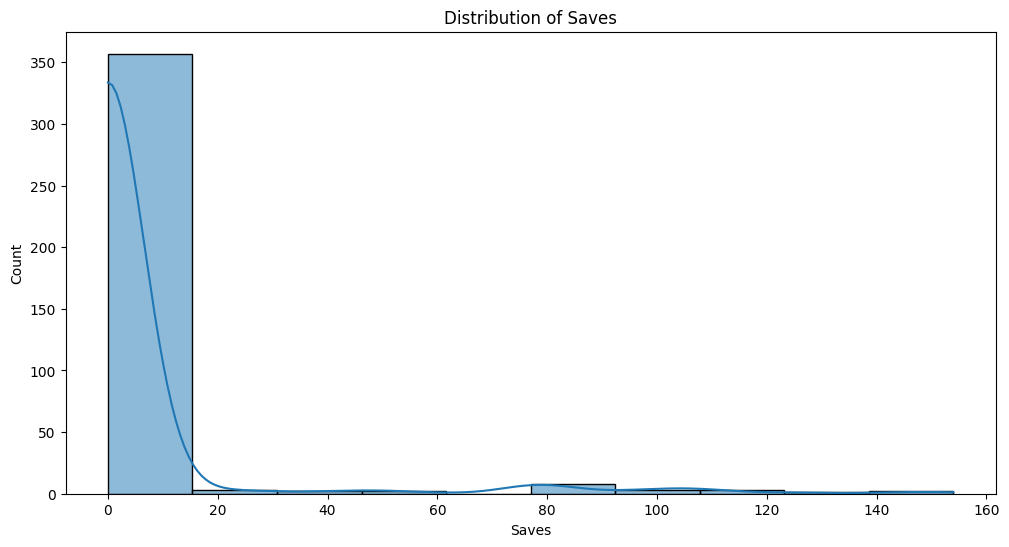

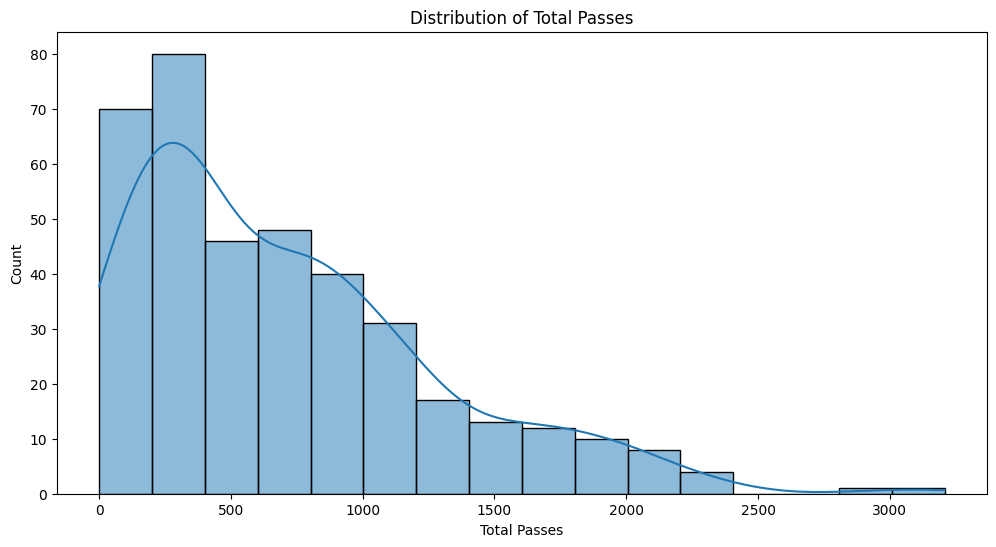

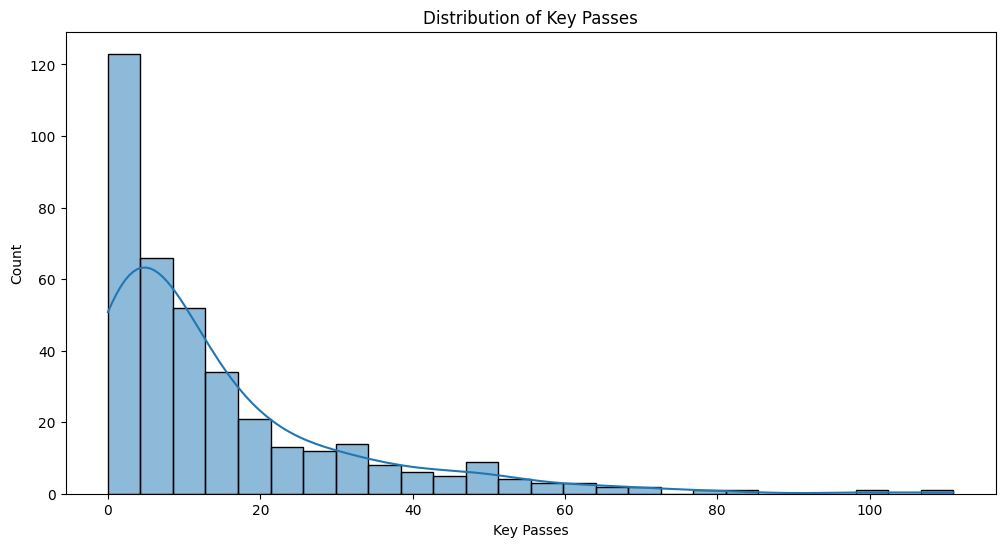

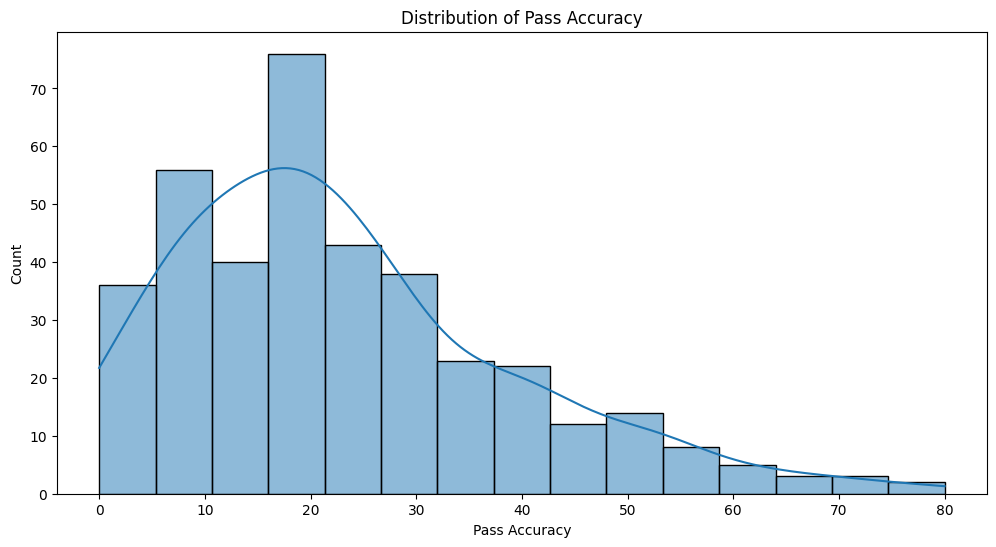

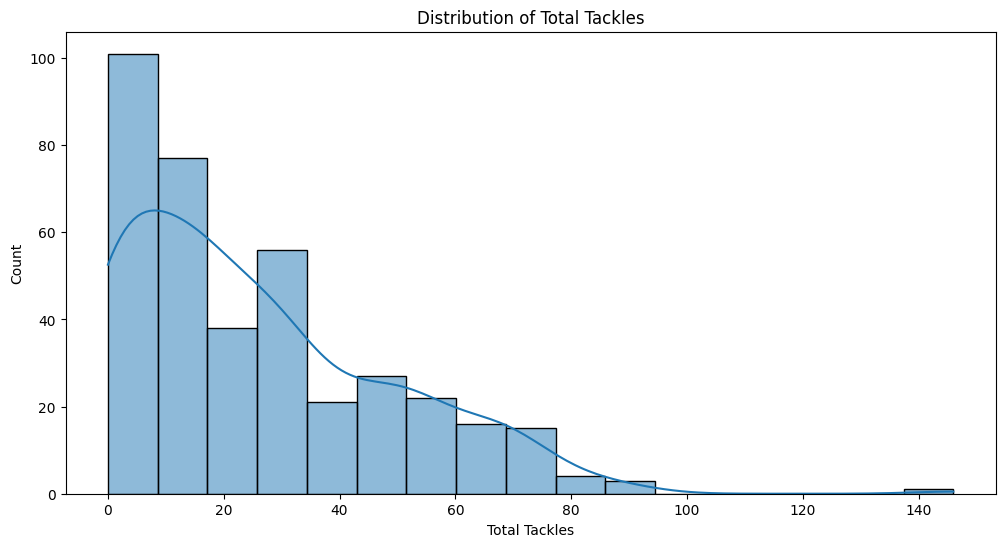

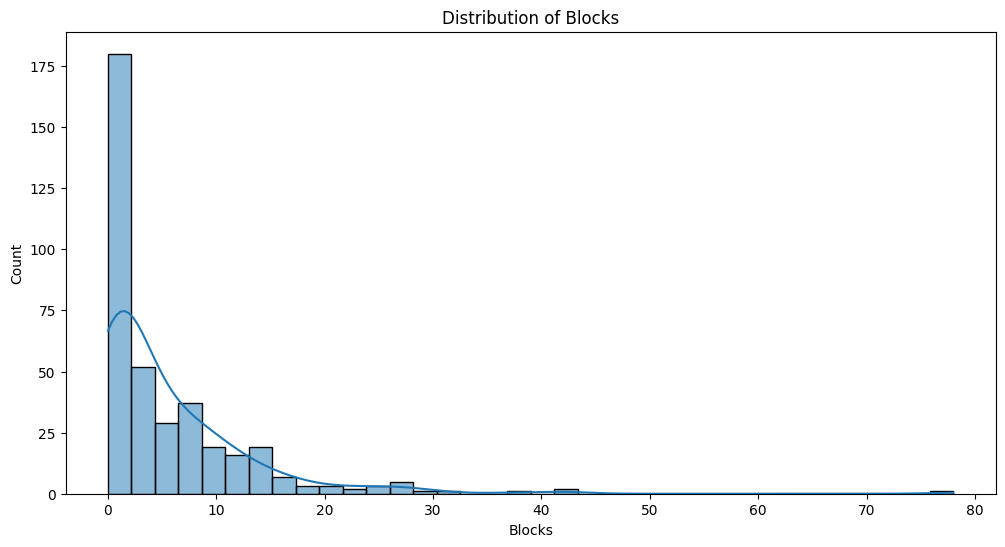

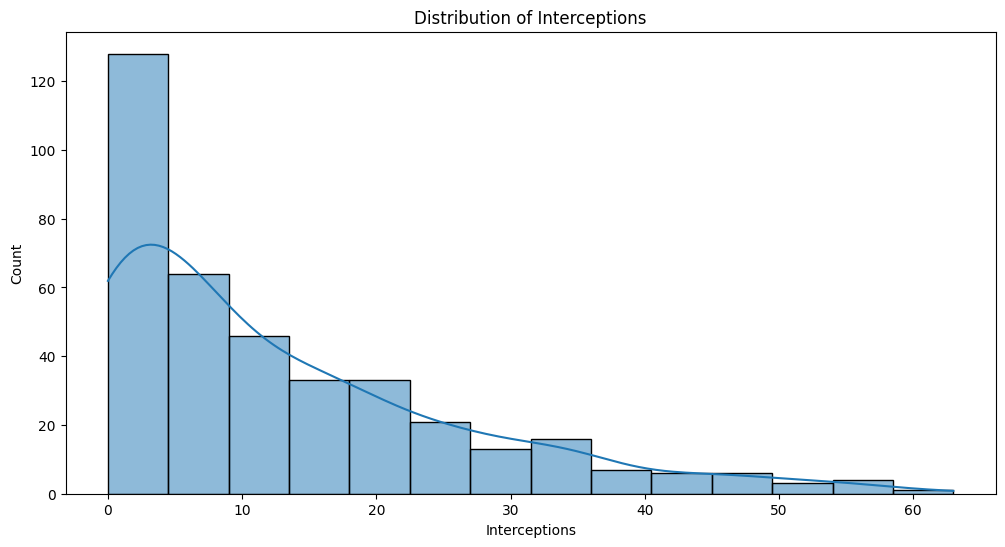

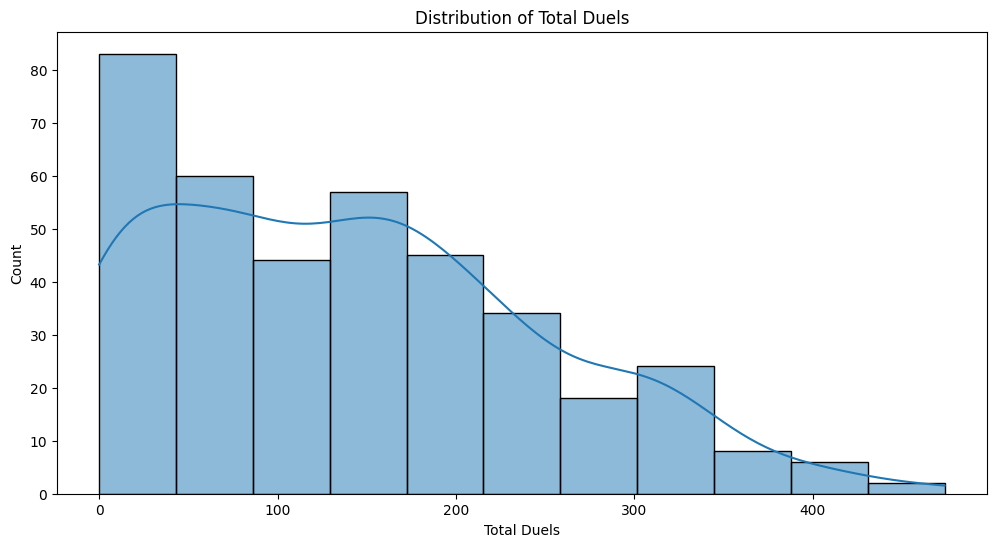

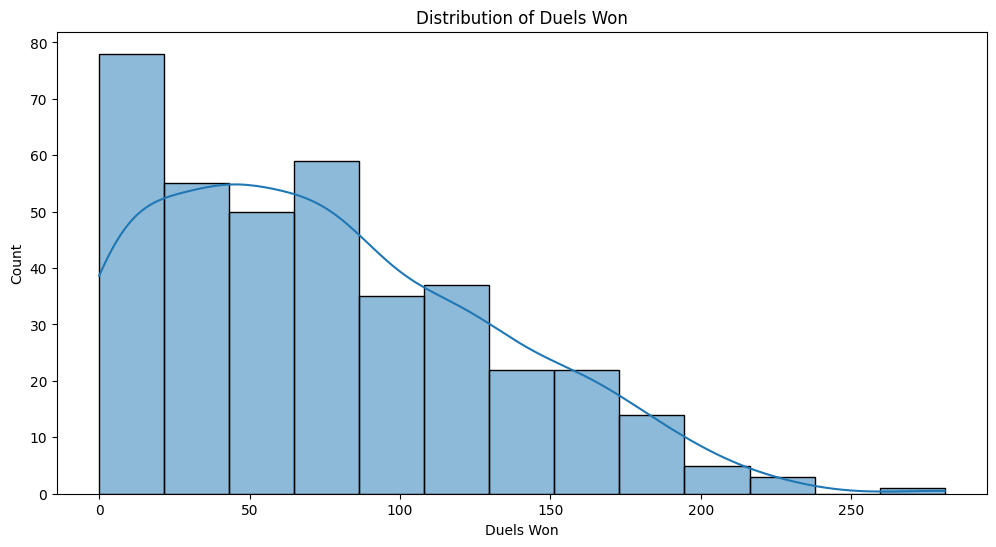

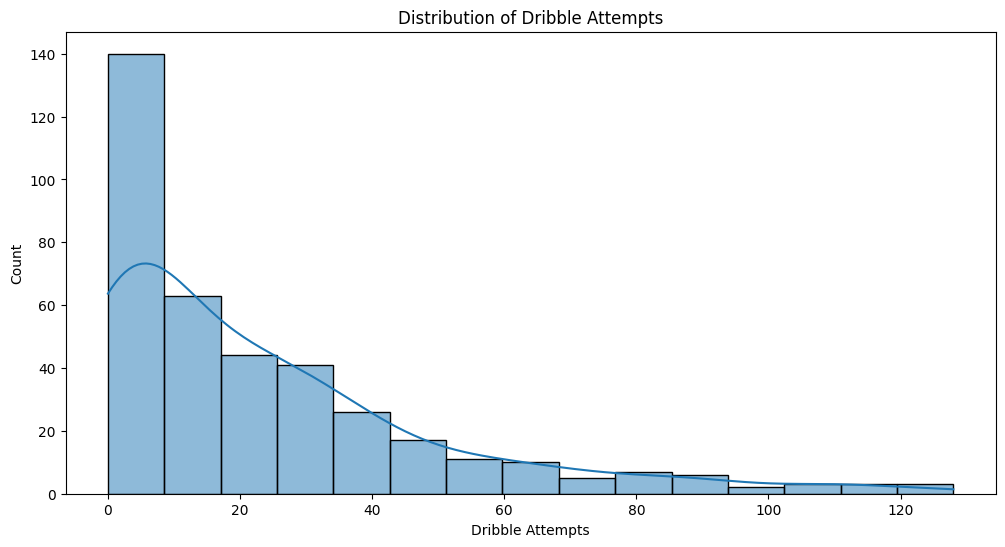

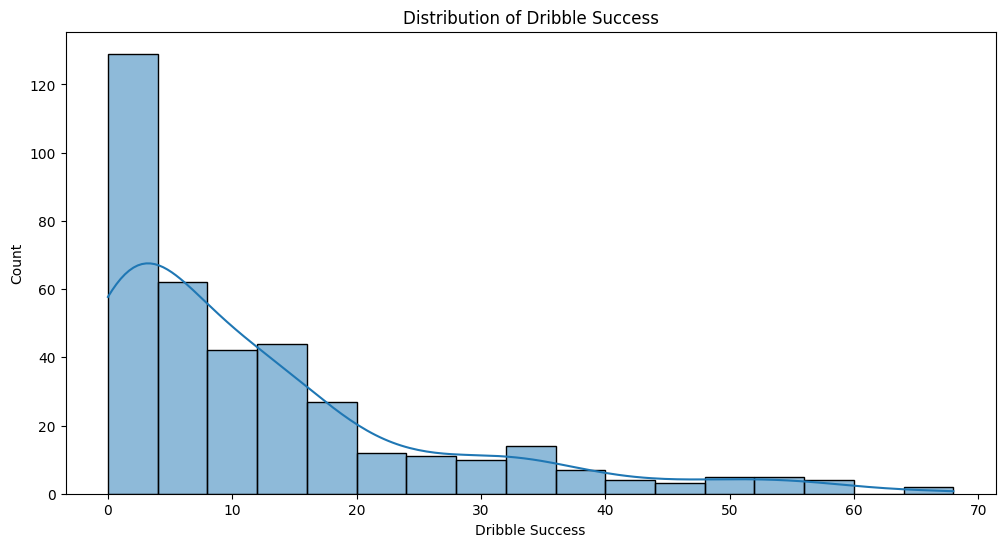

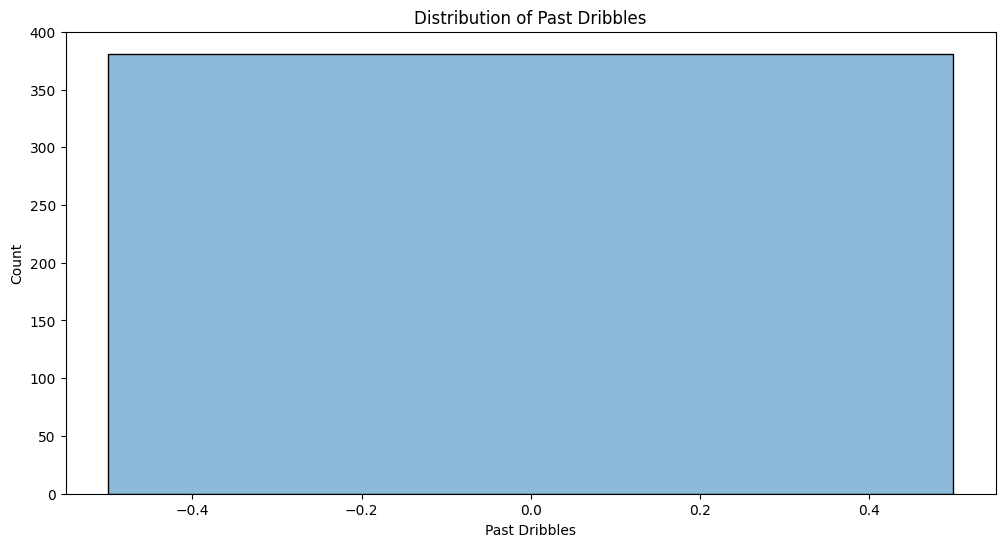

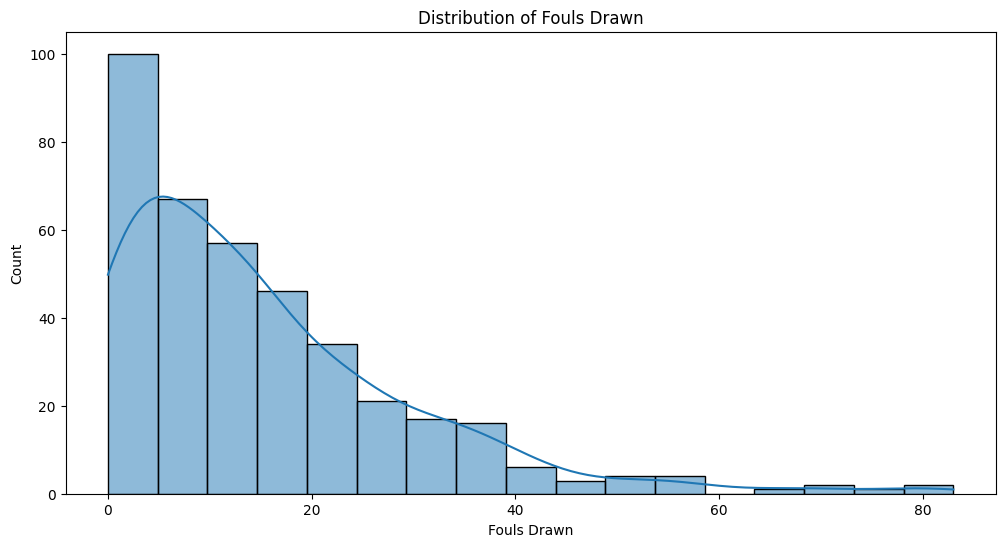

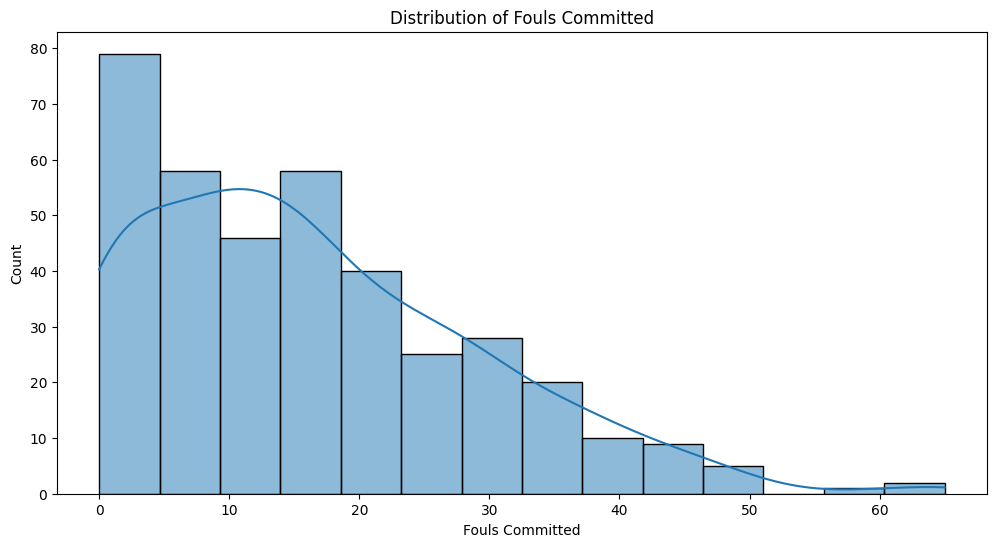

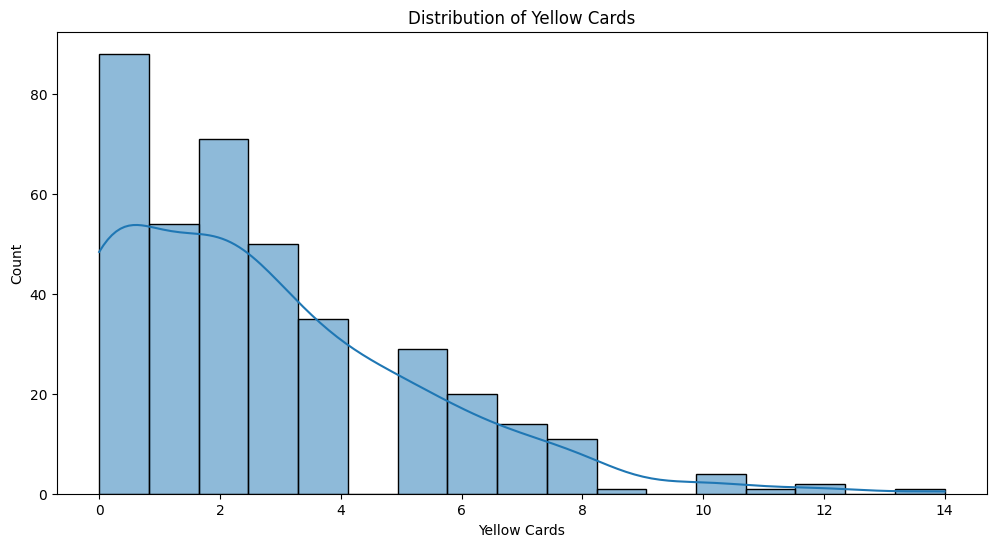

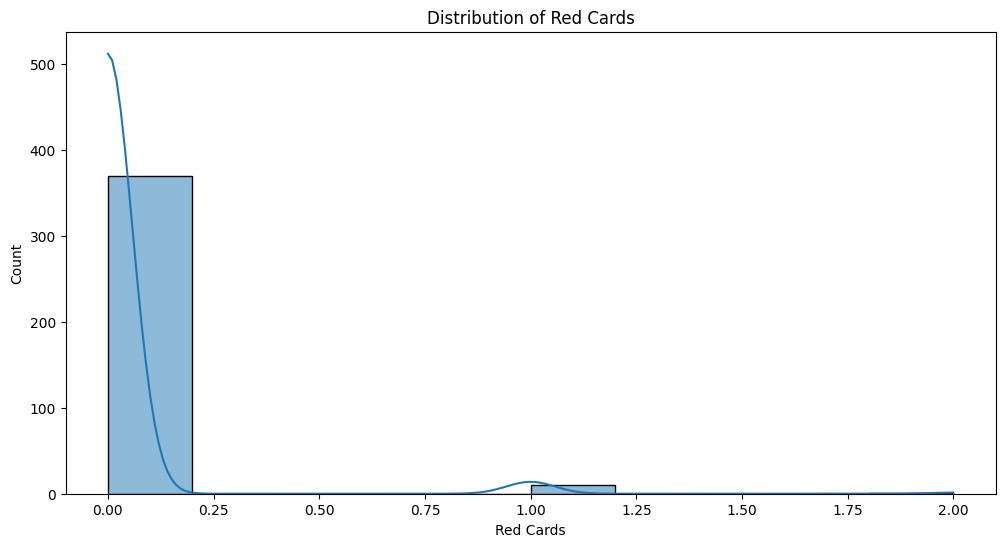

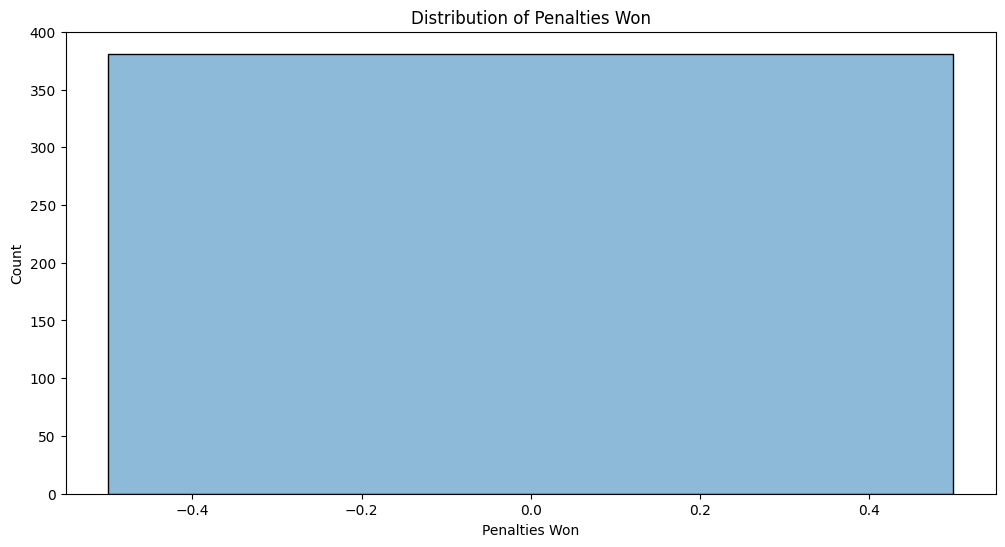

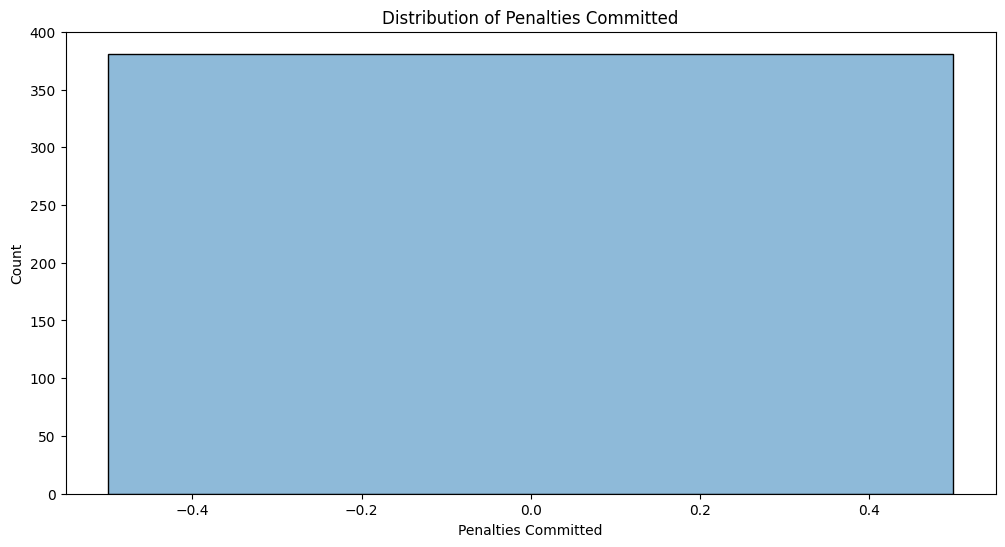

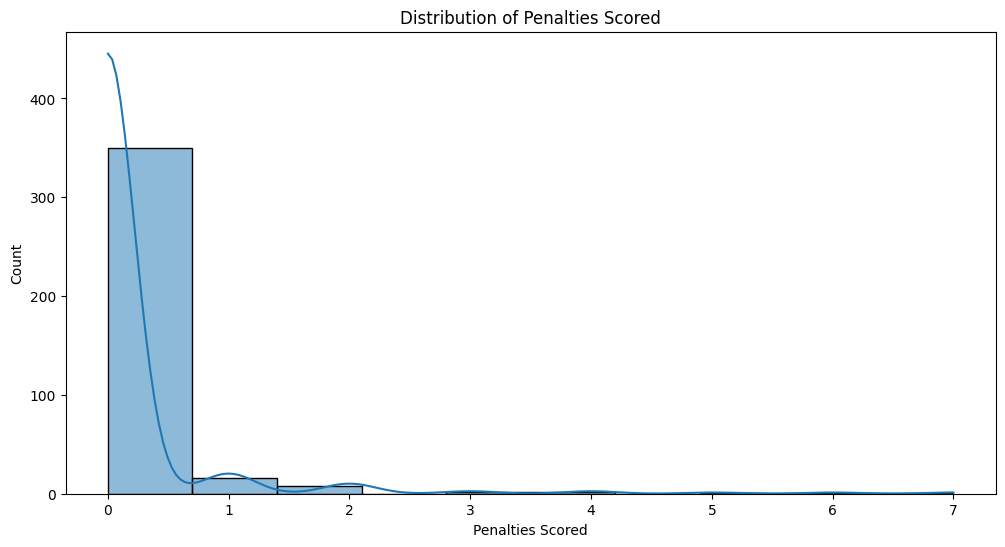

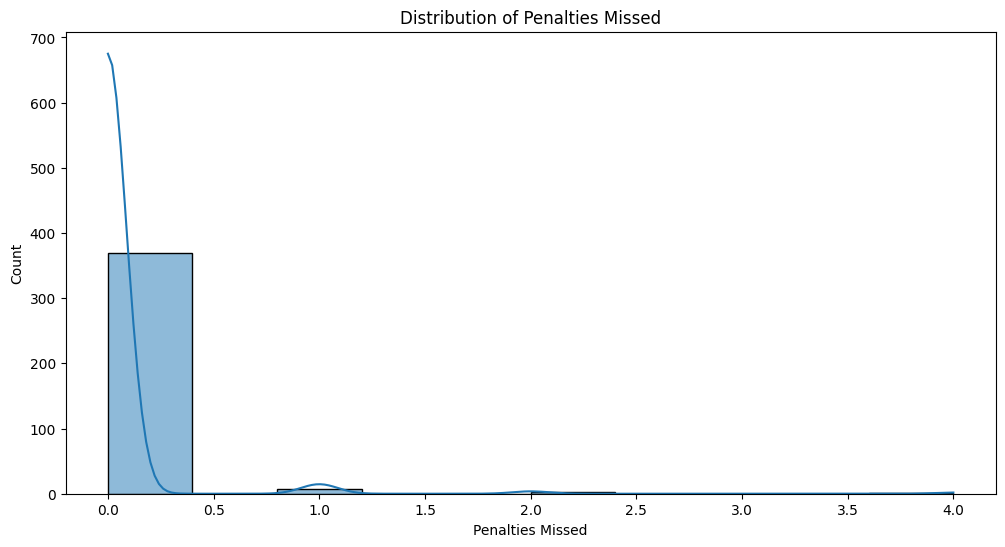

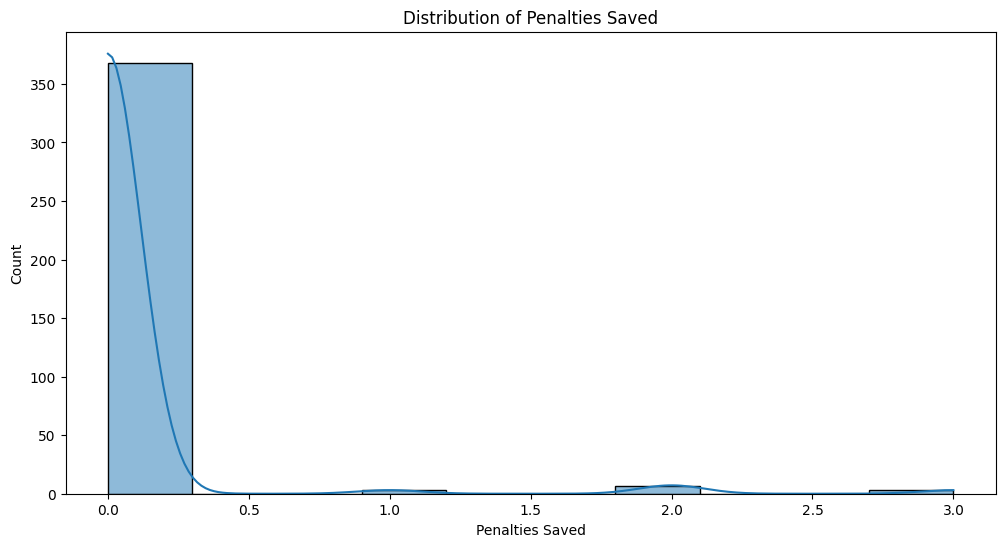

In [85]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
for column in numerical_columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

In [86]:
# Based off the distribution of our numerical features let's drop certain columns
data = data.drop(['Penalties Committed', 'Penalties Won', 'Past Dribbles', 'Captain', 'Number'], axis='columns')

numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

Now we need to handle all our categorical columns

C:\Users\Krish\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Krish\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 132 (\x84) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Krish\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Krish\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 133 (\x85) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Krish\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 137 (\x89) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


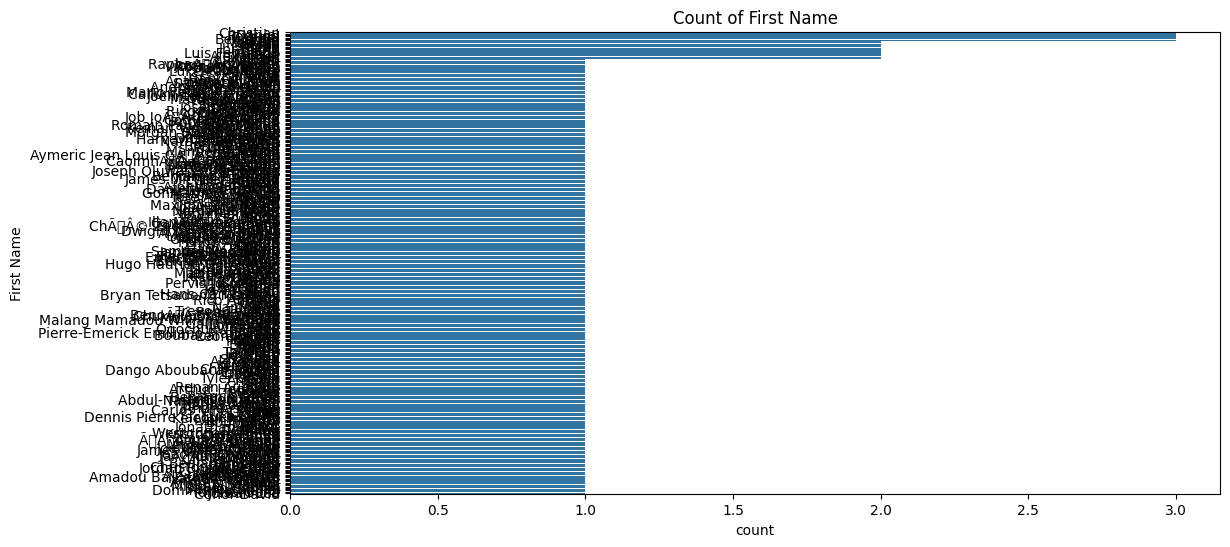

C:\Users\Krish\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Krish\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 132 (\x84) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Krish\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 159 (\x9f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Krish\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Krish\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 138 (\x8a) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Krish\AppData\Roaming\Pyth

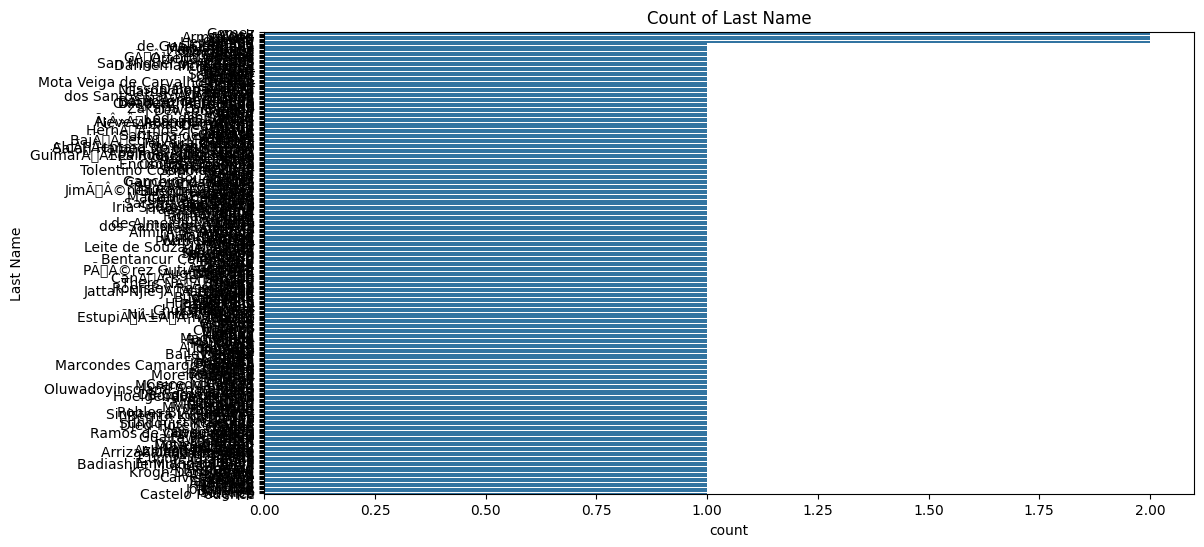

C:\Users\Krish\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


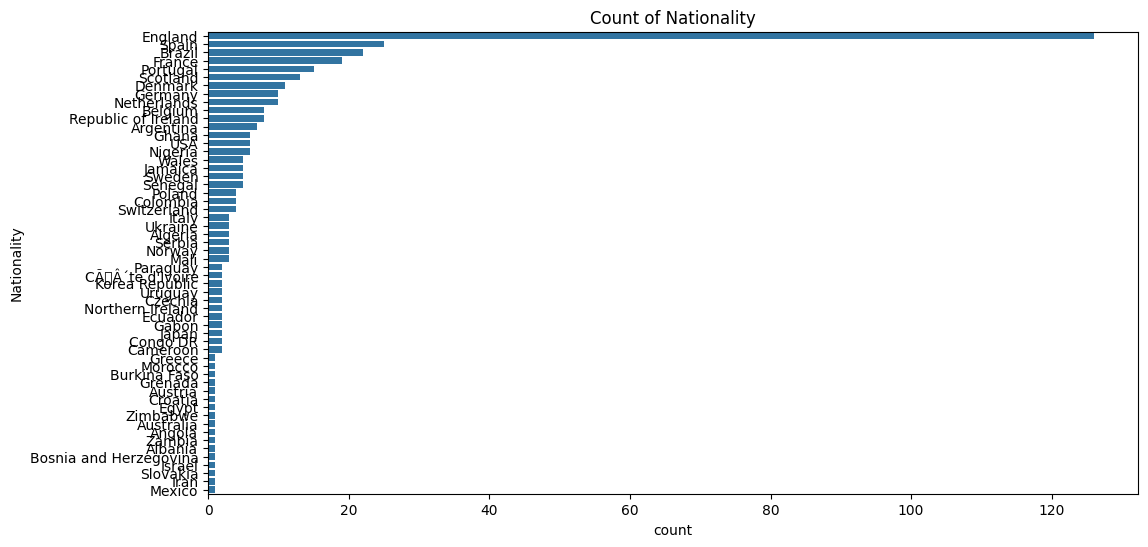

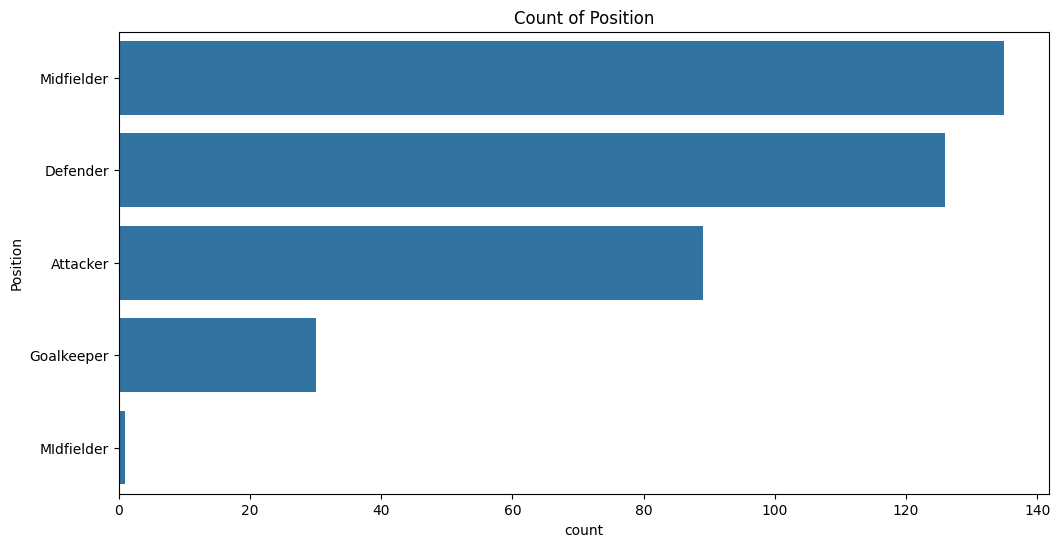

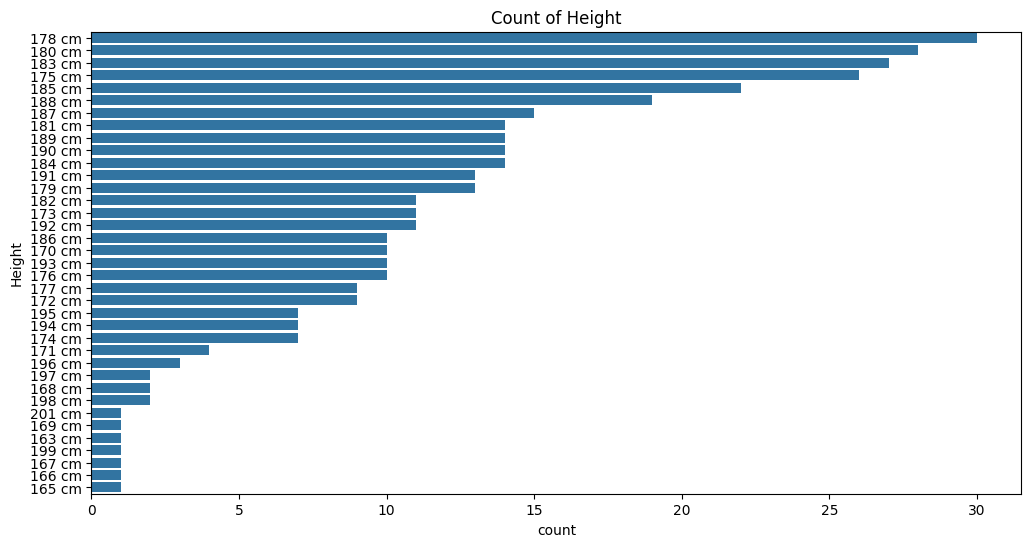

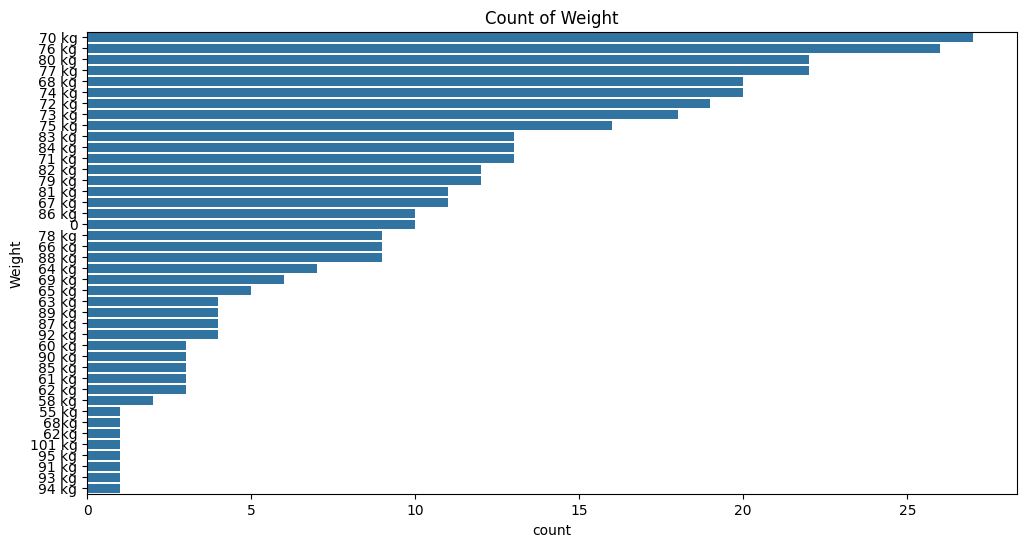

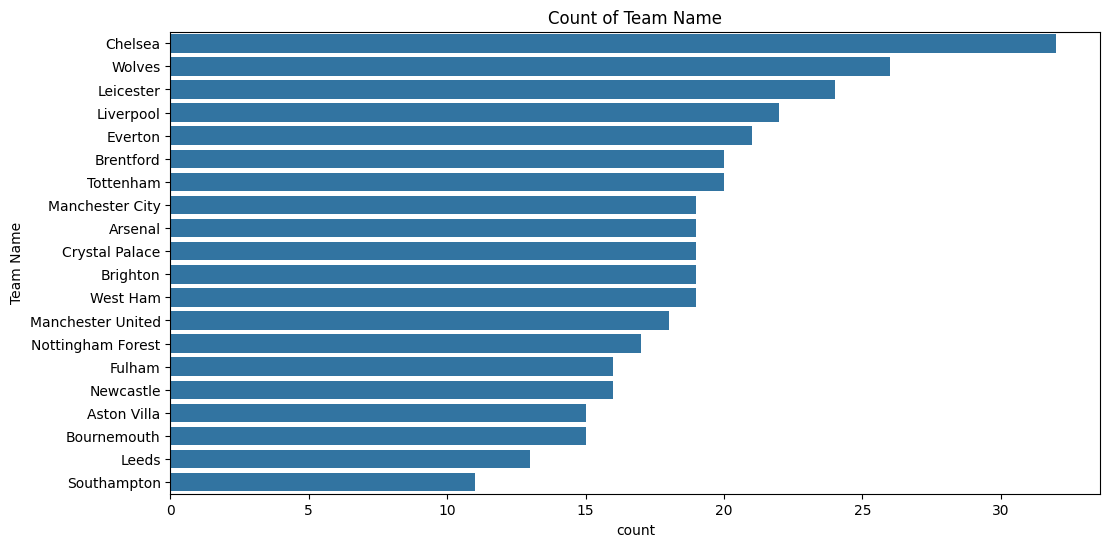

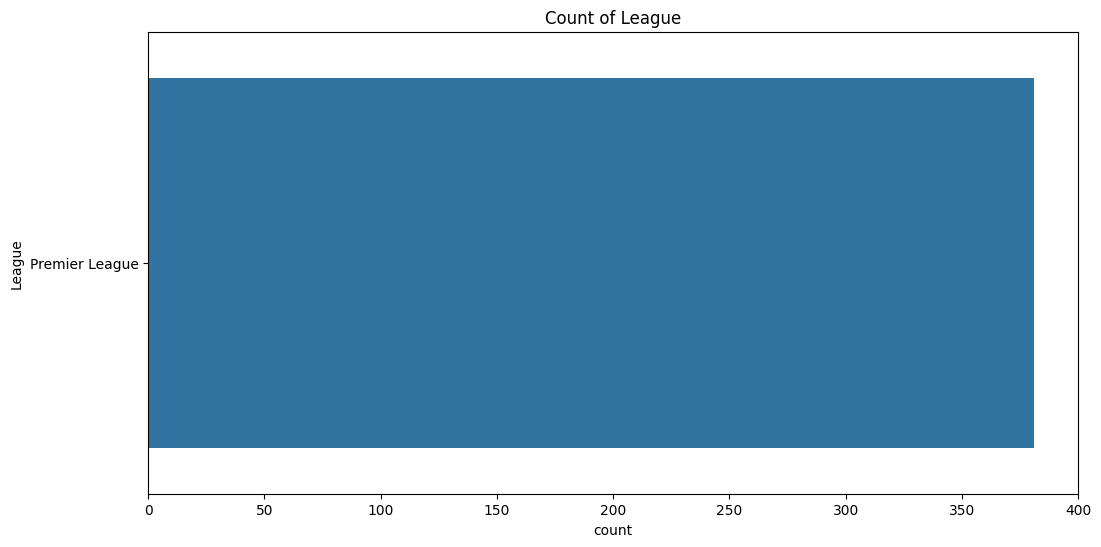

C:\Users\Krish\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Krish\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 132 (\x84) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Krish\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 159 (\x9f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Krish\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Krish\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 138 (\x8a) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Krish\AppData\Roaming\Pyth

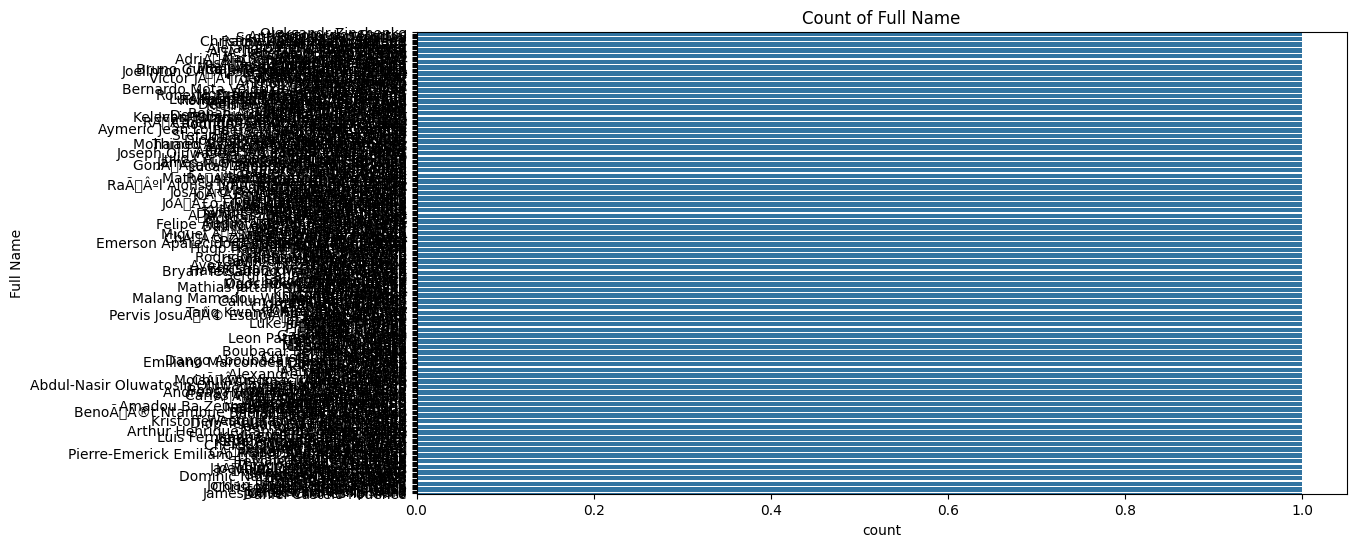

In [87]:
# Count Plots for Categorical Columns
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(y=data[column], order = data[column].value_counts().index)
    plt.title(f'Count of {column}')
    plt.show()

Converting the height and weight columns into integers so we obtain it in a numerical format

In [88]:
# Removing "kg" from weight and converting to integer
data['Weight'] = data['Weight'].str.replace('kg','').astype(int)

# Removing "cm" from height and converting to integer
data['Height'] = data['Height'].str.replace('cm', '').astype(int)

Now we will use Ordinal Encoding to take care of the 'Teams' column as each team has a specific rank and importance which may be higher and lower than the others. (This is done based off their league ranking)

In [89]:
team_rankings = {
    'Manchester City': 1,
    'Arsenal': 2,
    'Manchester United': 3,
    'Newcastle': 4,
    'Liverpool': 5,
    'Brighton': 6,
    'Aston Villa': 7,
    'Tottenham': 8,
    'Brentford': 9,
    'Fulham': 10,
    'Crystal Palace': 11,
    'Chelsea': 12,
    'Wolves': 13,
    'West Ham': 14,
    'Bournemouth': 15,
    'Nottingham Forest': 16,
    'Everton': 17,
    'Leicester': 18,
    'Leeds': 19,
    'Southampton': 20
}

In [90]:
# Create a new column 'Team_Rank' with the encoded values
data['Team Rank'] = data['Team Name'].map(team_rankings)

In [91]:
print(data[['Weight', 'Height', 'Team Rank']].head())

   Weight  Height  Team Rank
0      64     175          2
1      77     185          2
2      83     193          2
3      72     178          2
4      61     172          2


Now in order to preserve the importance of the nationality column, we will use frequency encoding and rank them based off their count in the dataset

In [92]:
def frequency_encoding(column_name, df):
    # Create a mapping of category: frequency
    frequency_map = df[column_name].value_counts().to_dict()

    # Map the column with the frequency map
    df[column_name + '_encoded'] = df[column_name].map(frequency_map)

    return df

In [93]:
data = frequency_encoding('Nationality', data)

For the postions column, the position of a player is key in football as each has it's own roles and responsibilities which may lead to varying salaries. Hence to encode it we need to understand what is the relationship between each position with the target variable

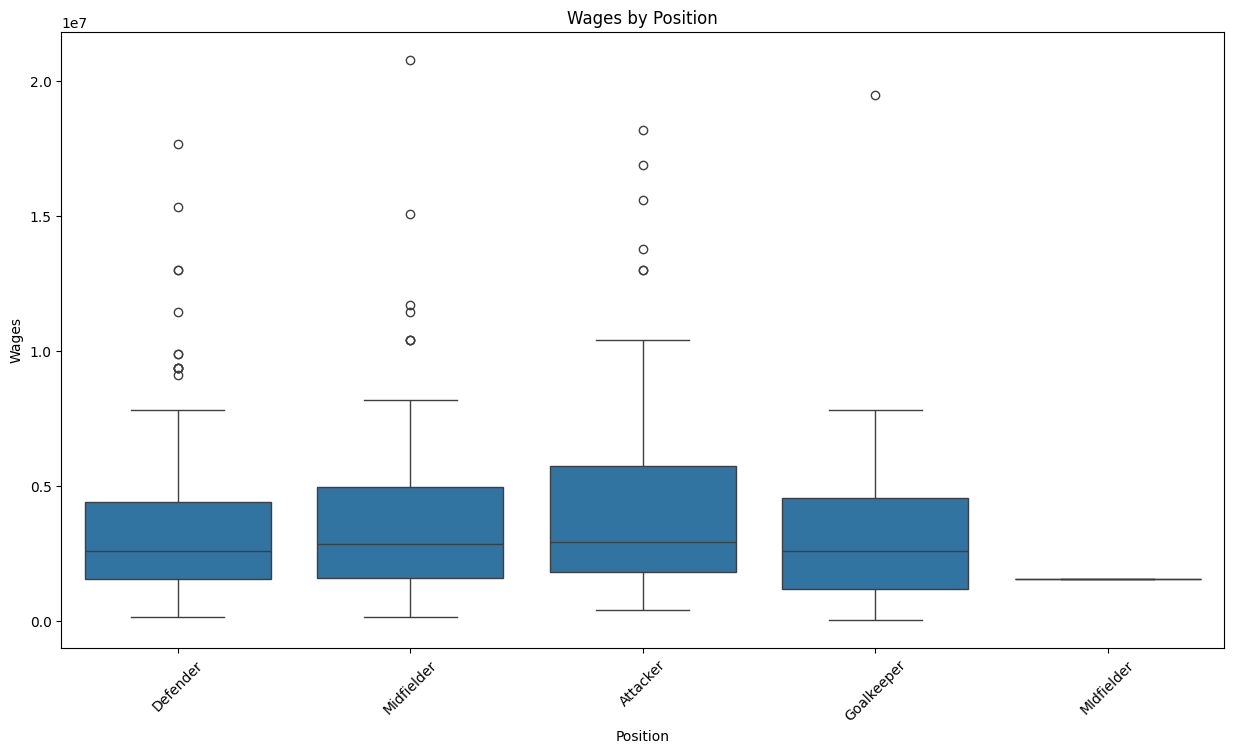

In [94]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Position', y='Wages', data=data)
plt.title('Wages by Position')
plt.xticks(rotation=45)  # Rotate labels for better readability if needed
plt.show()

Here we notice one small error which needs to be fixed regarding the midfielder position

In [95]:
# Replace 'MIdfielder' with 'Midfielder' in the 'Position' column
data['Position'] = data['Position'].replace('MIdfielder', 'Midfielder')

Now we plot the boxplot once again to obtain an accurate representation

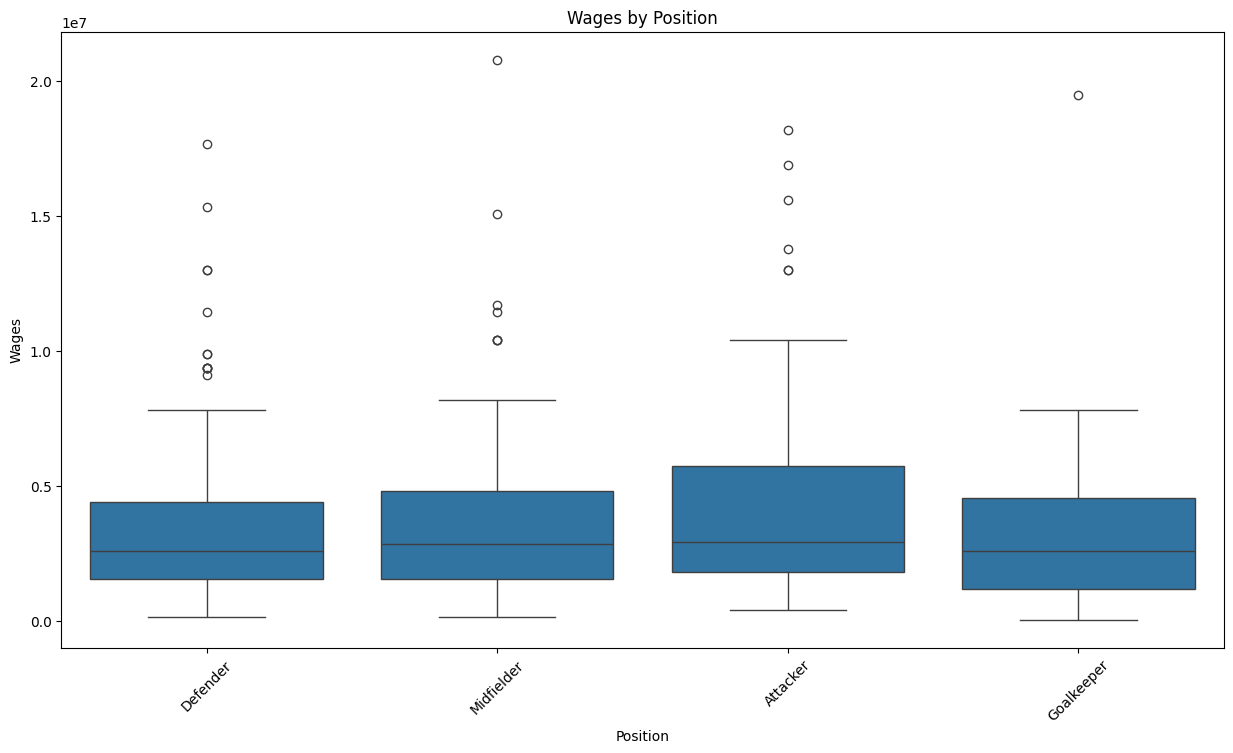

In [96]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Position', y='Wages', data=data)
plt.title('Wages by Position')
plt.xticks(rotation=45)  # Rotate labels for better readability if needed
plt.show()

From the boxplot above we can observe outliers in each position which need to be removed in order to ensure a smoother model. We will use the IQR approach as we do not have a normal distribution.

In [97]:
# Grouping by Position and then applying the IQR method for each group
def remove_outliers(group):
    Q1 = group['Wages'].quantile(0.25)
    Q3 = group['Wages'].quantile(0.75)
    IQR = Q3 - Q1
    filter = (group['Wages'] >= Q1 - 1.5*IQR) & (group['Wages'] <= Q3 + 1.5*IQR)
    return group[filter]

In [98]:
# Applying the function to each group
data = data.groupby('Position').apply(remove_outliers).reset_index(drop=True)

In [99]:
data.shape

(355, 43)

Now we have a clear definition to rank the positions using ordinal encoding.

In [100]:
# Create a dictionary for the specified ordinal encoding
position_mapping = {
    'Attacker': 1,
    'Midfielder': 2,
    'Goalkeeper': 3,
    'Defender': 4
}

In [101]:
# Use the map() function to replace the values in the 'Position' column
data['Position_encoded'] = data['Position'].map(position_mapping)

In [102]:
# Drop the Position column
data = data.drop('Position', axis='columns')

In order to get a better understanding, we will plot the distribution of our wages with respect to our features in the dataset

In [103]:
# List of numerical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [104]:
# Removing 'Wages' from the list, if it's in there
if 'Wages' in numerical_cols:
    numerical_cols.remove('Wages')

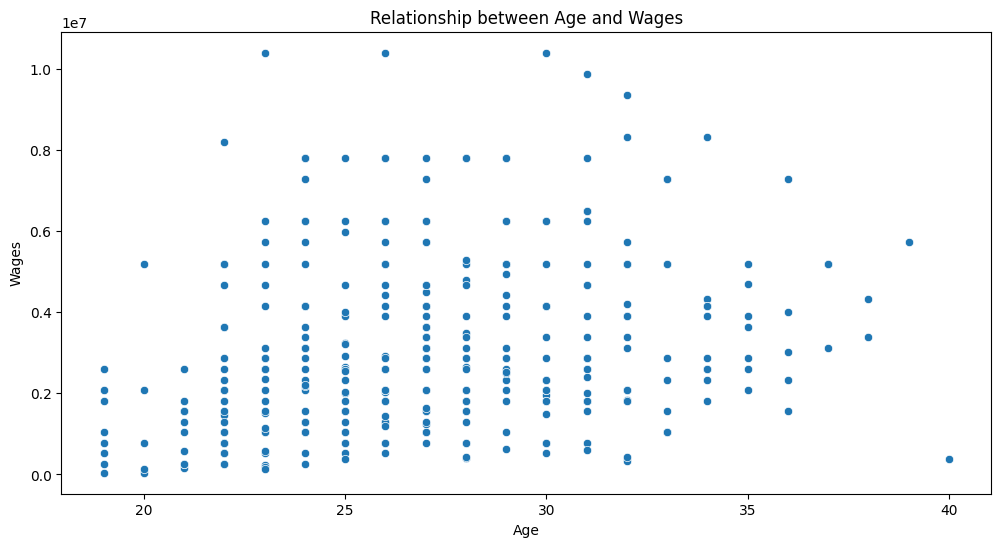

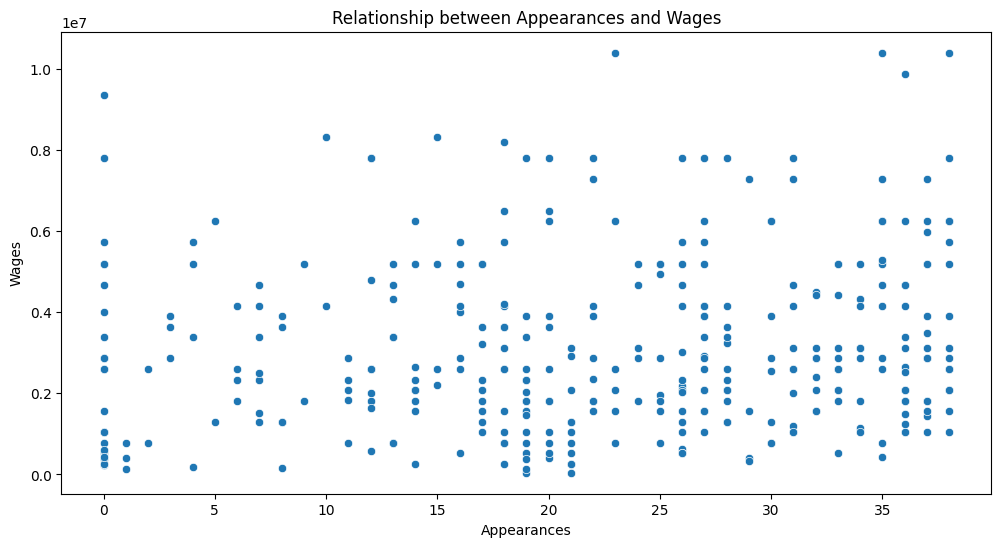

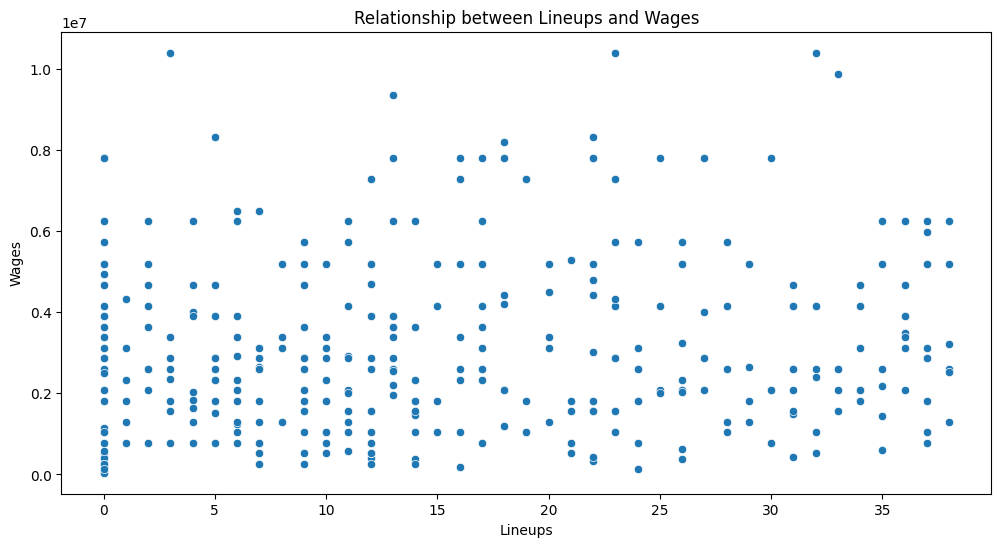

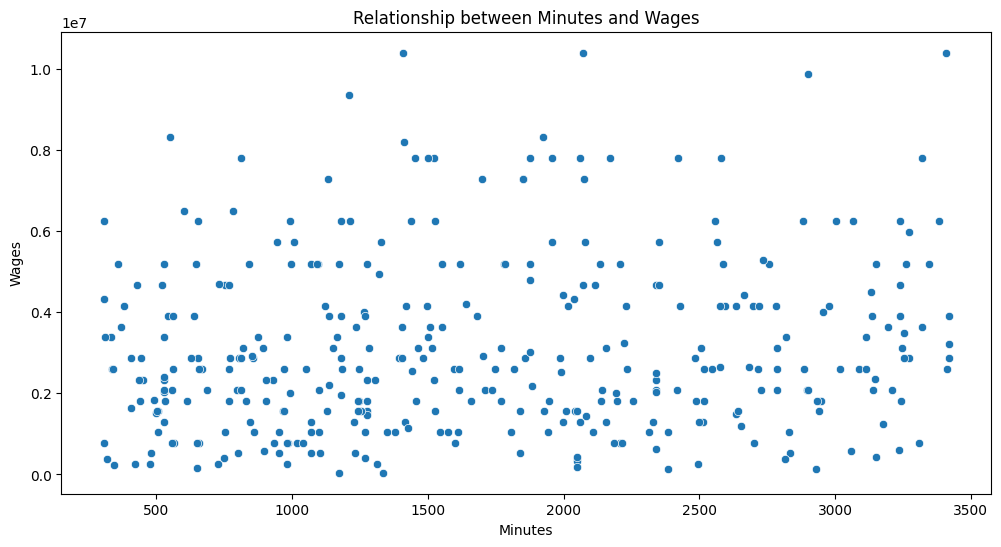

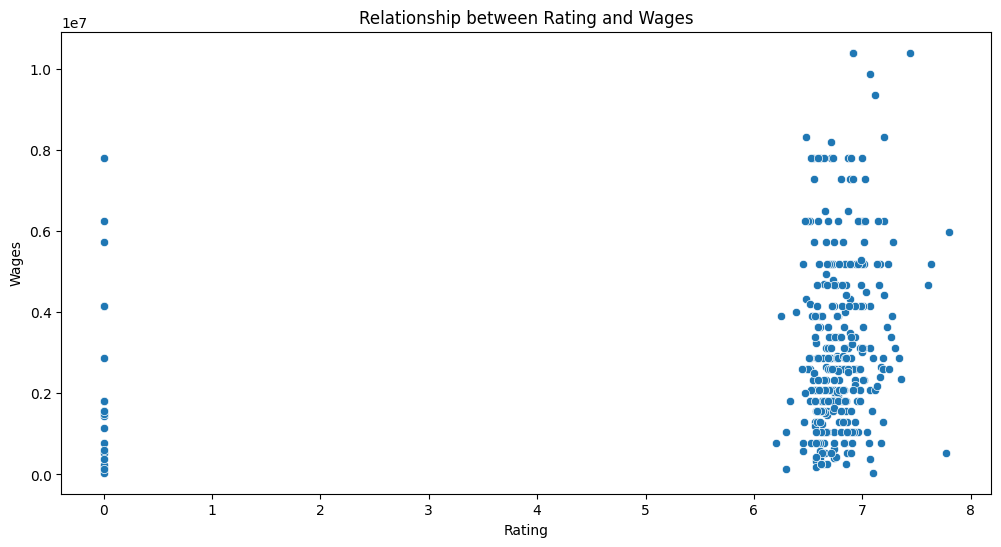

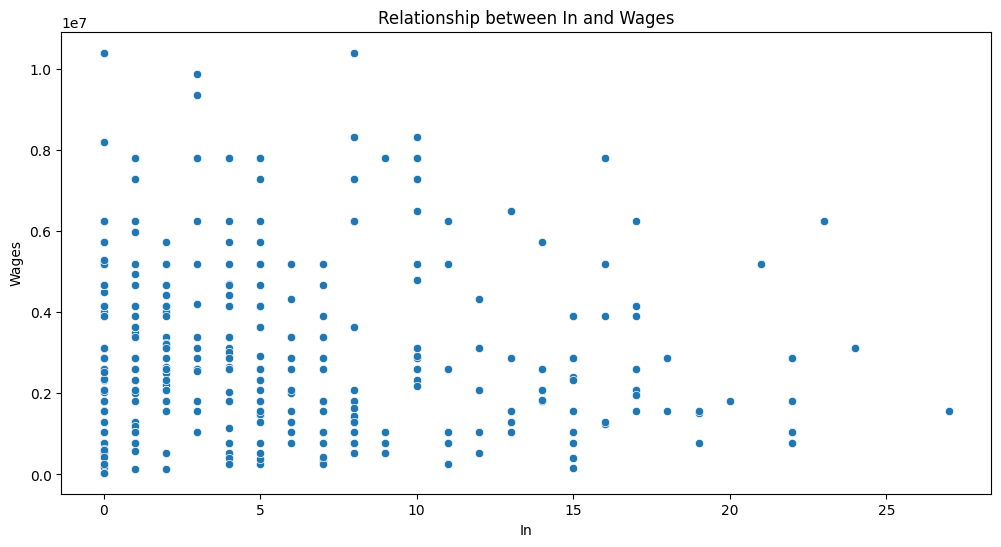

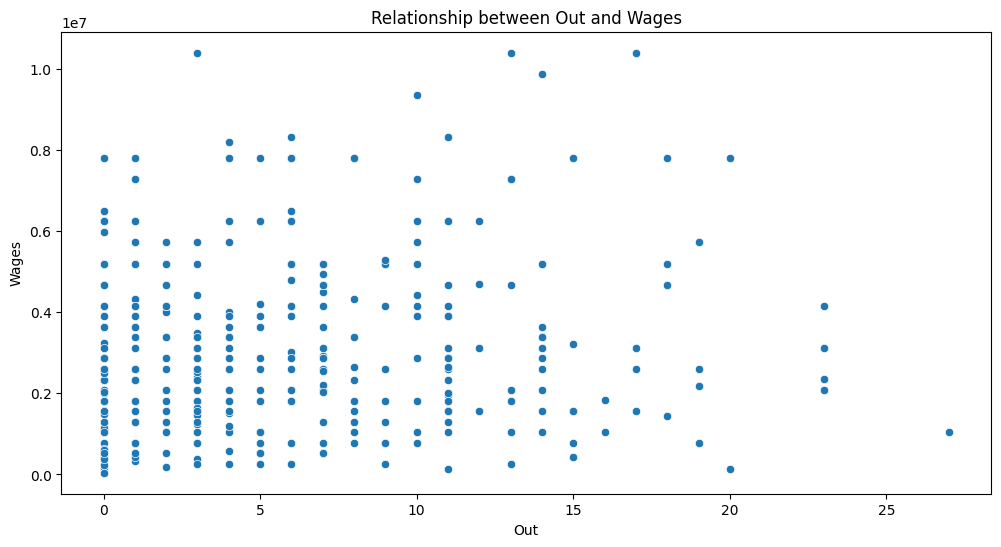

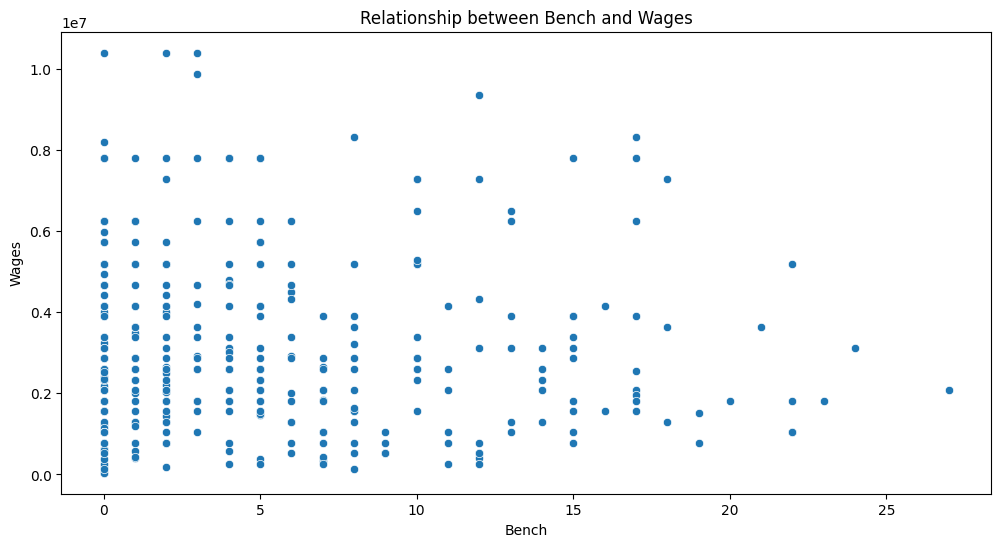

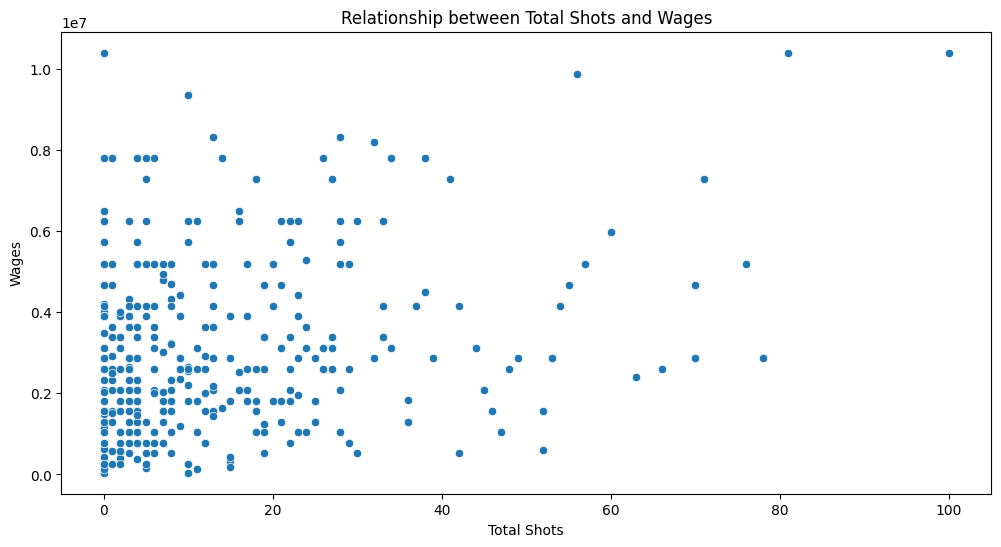

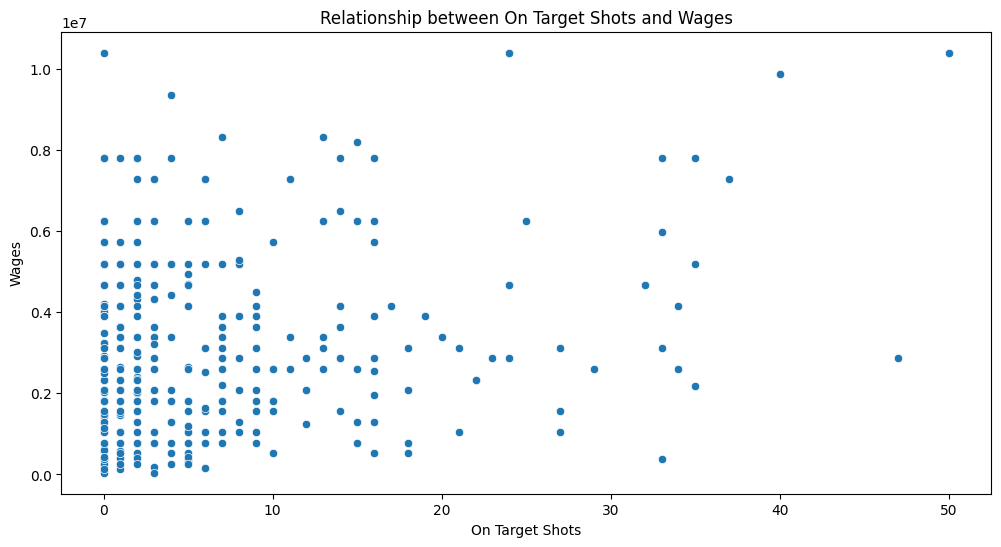

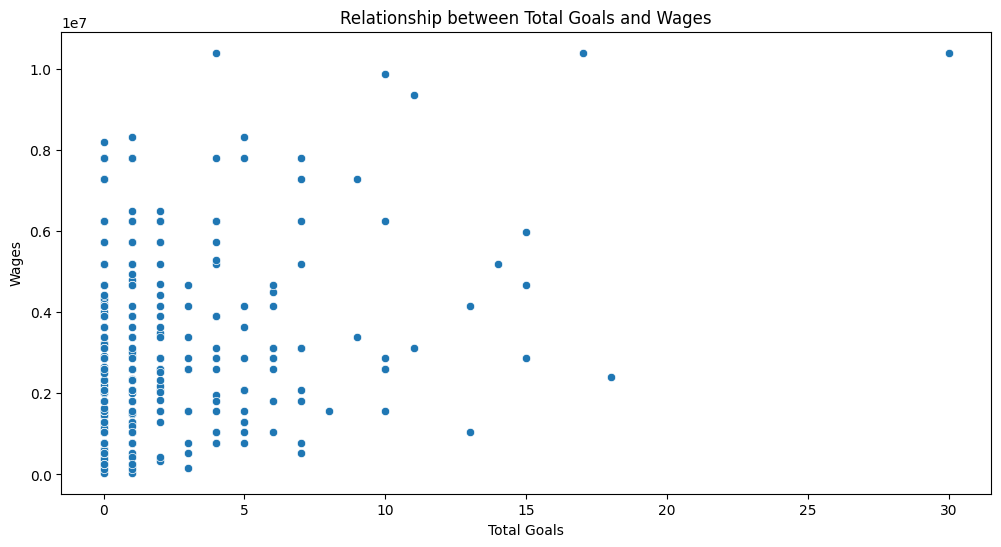

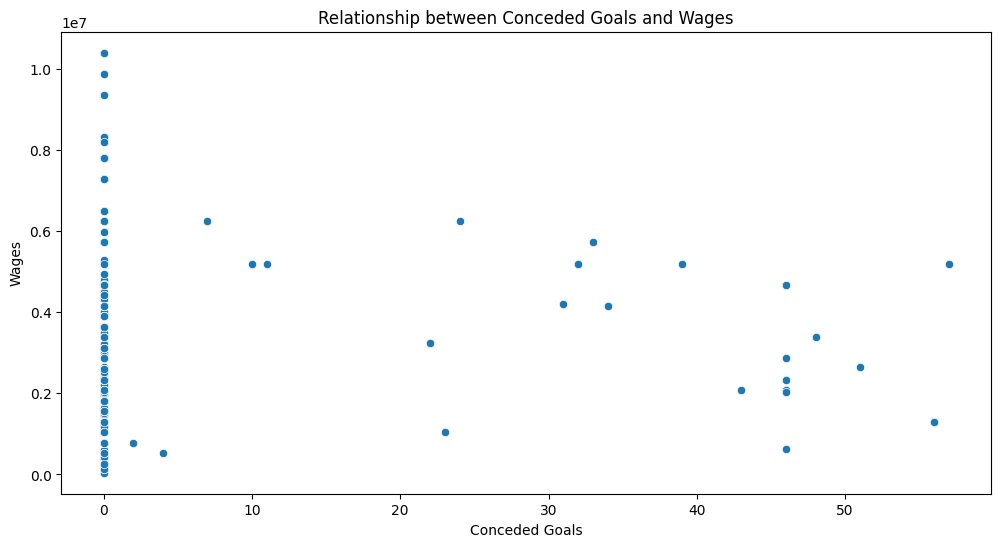

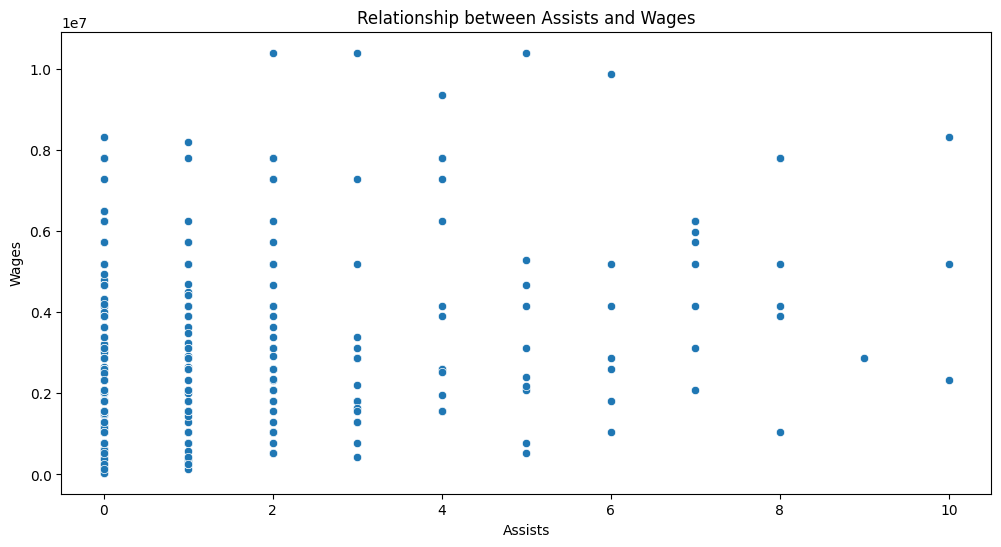

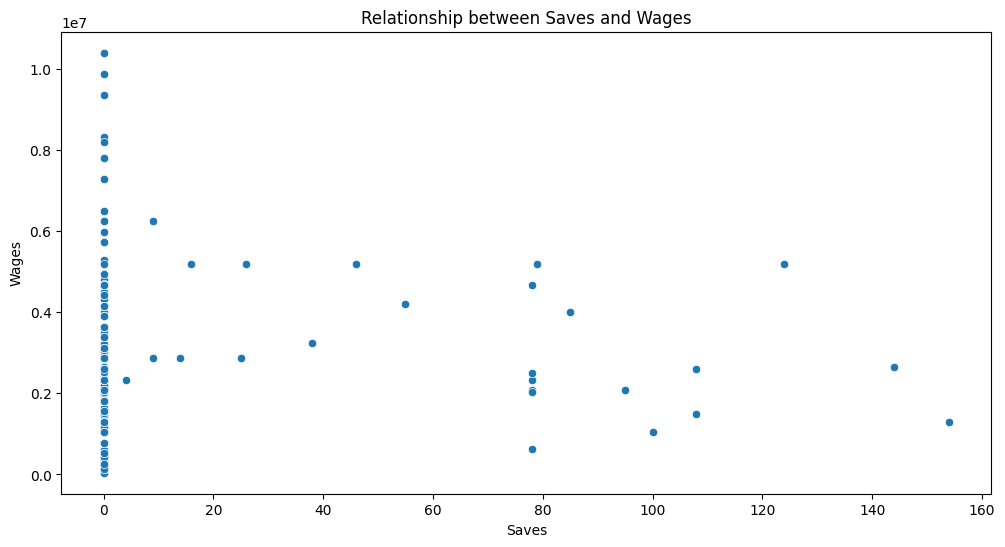

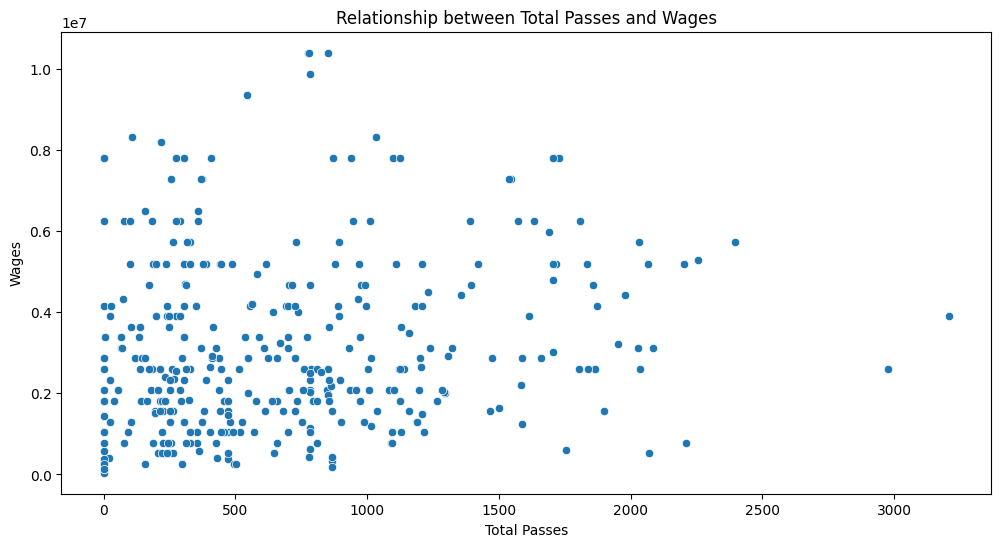

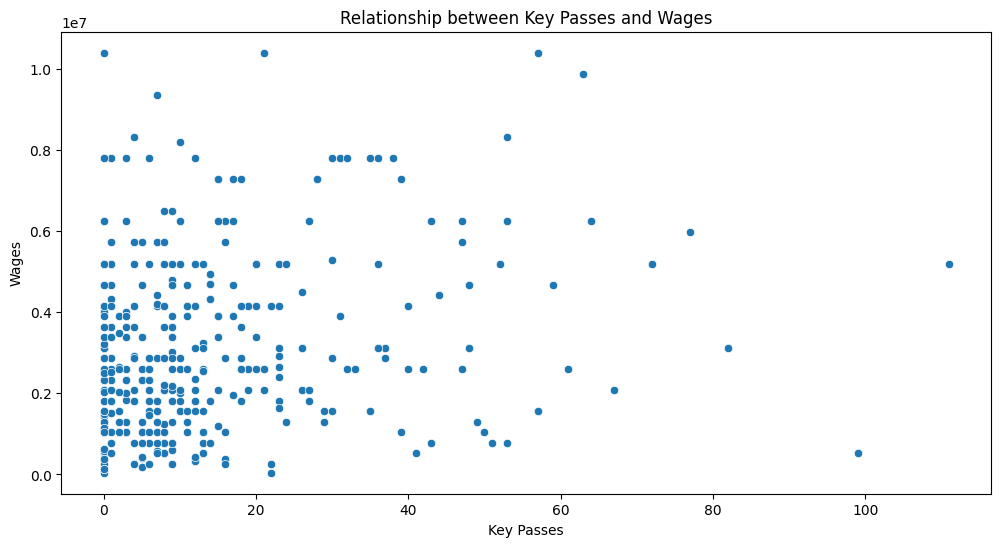

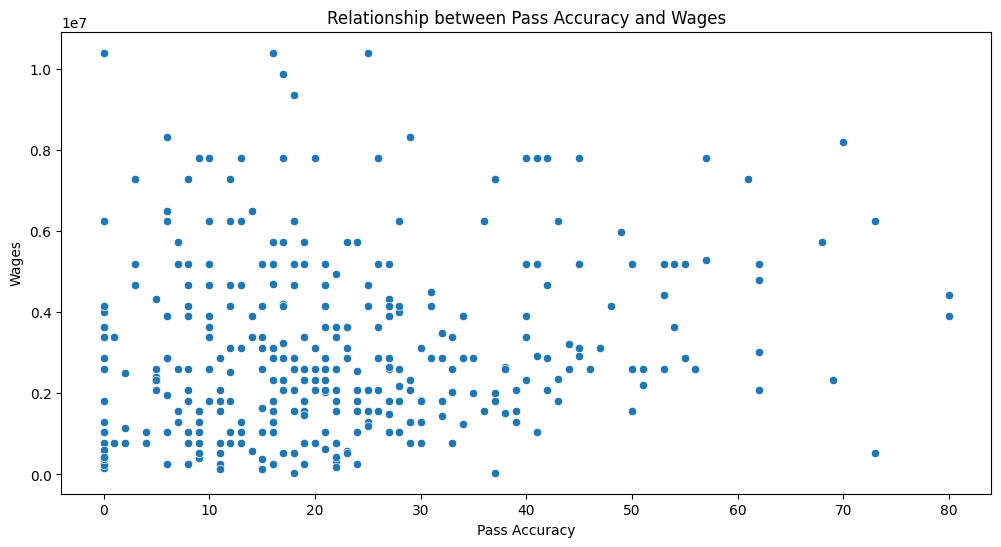

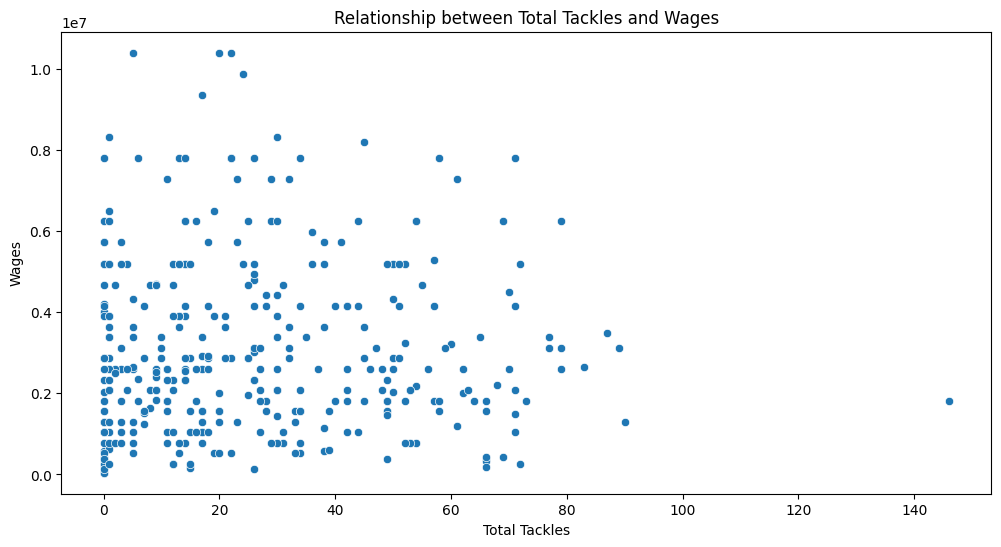

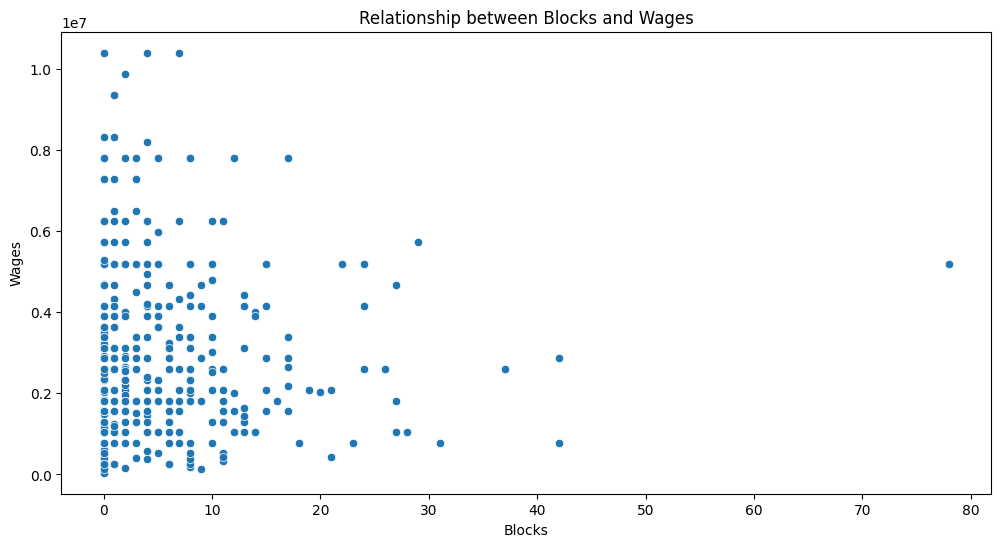

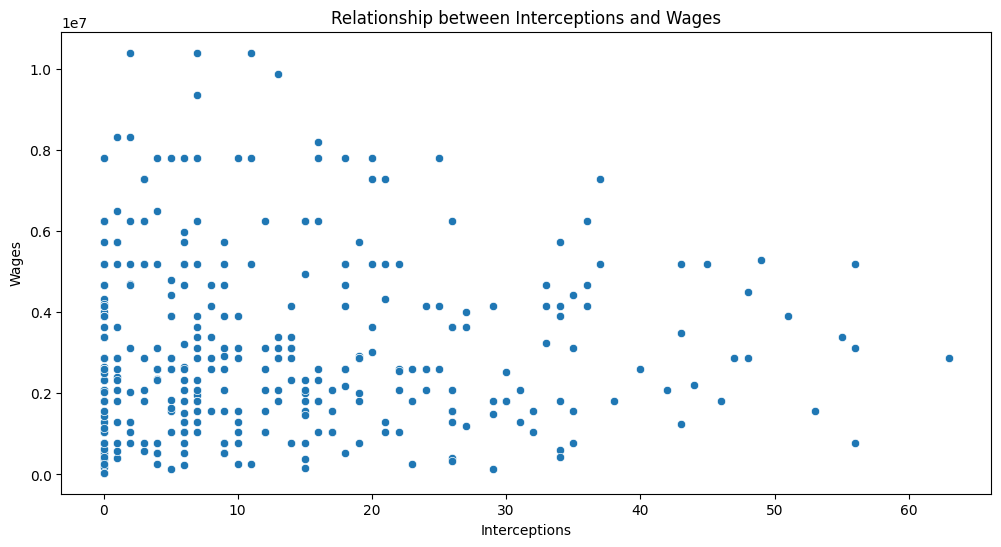

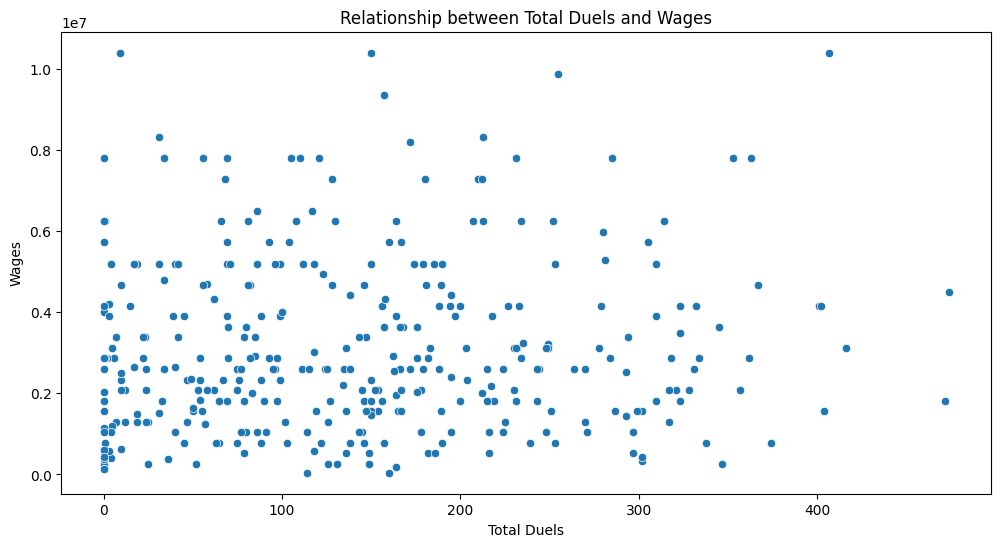

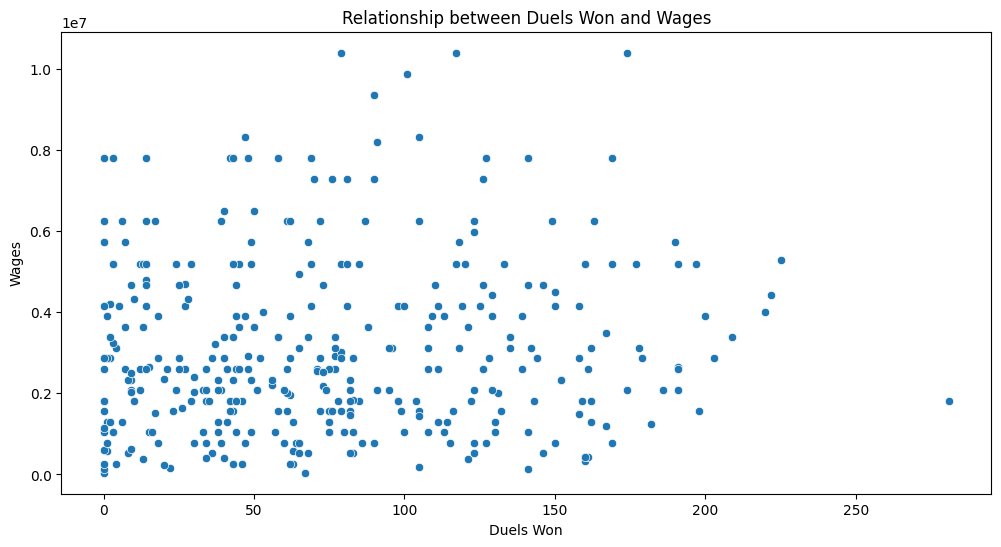

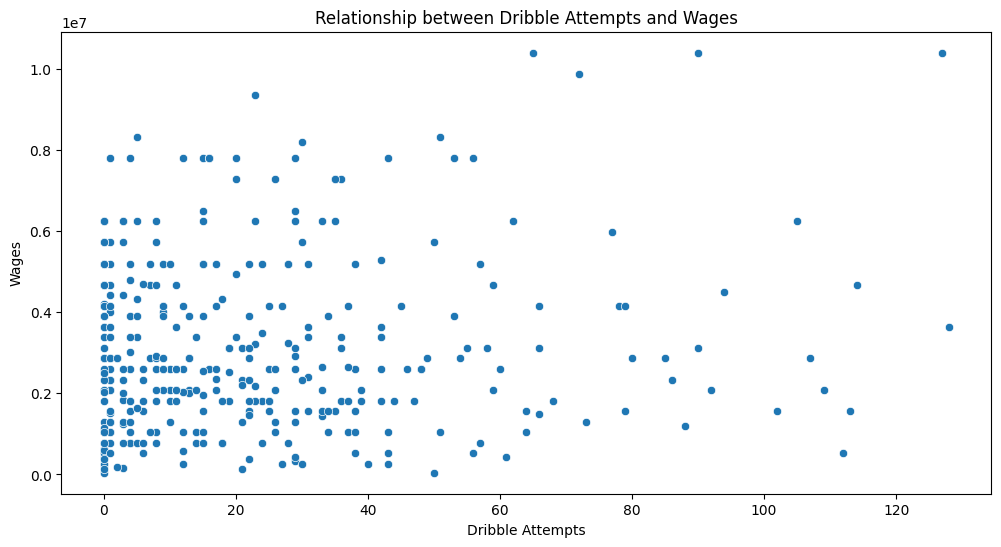

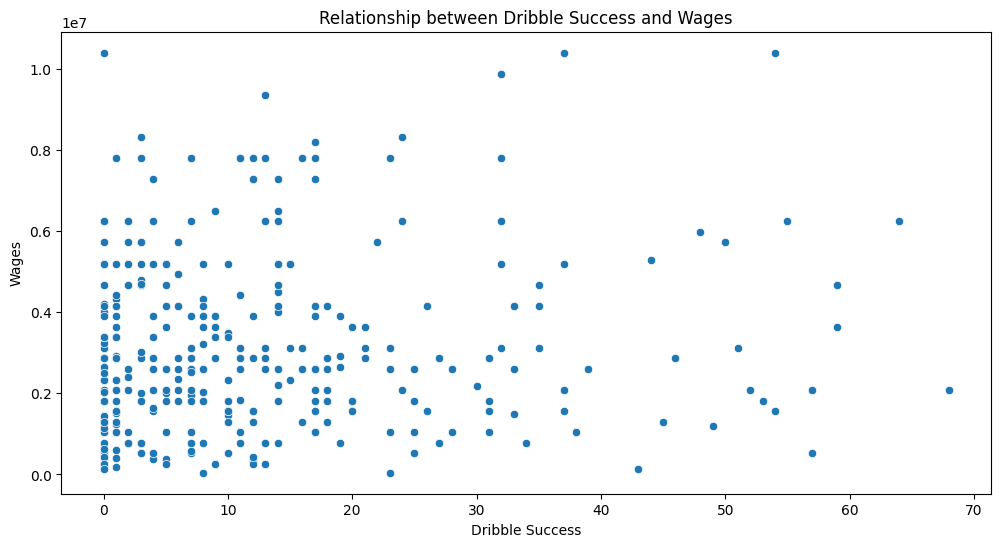

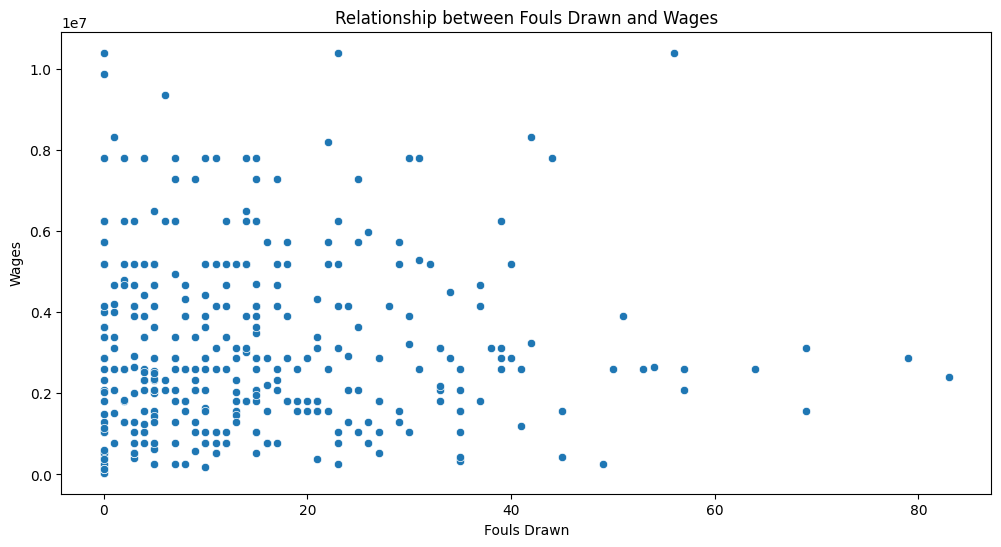

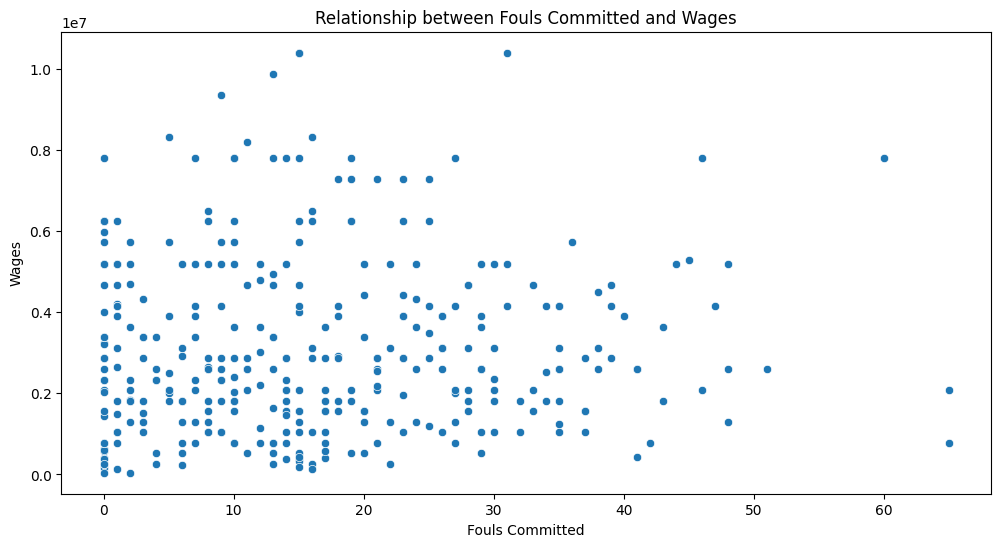

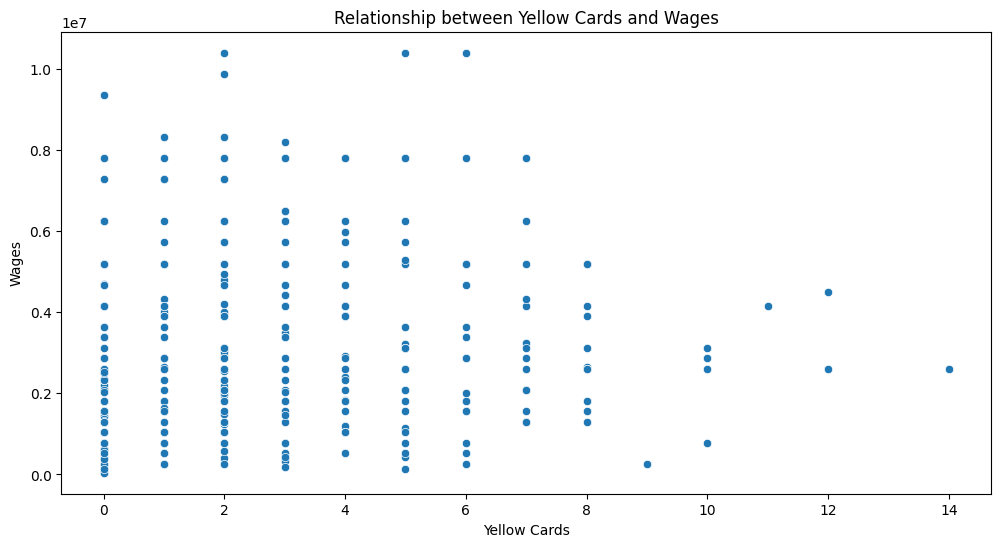

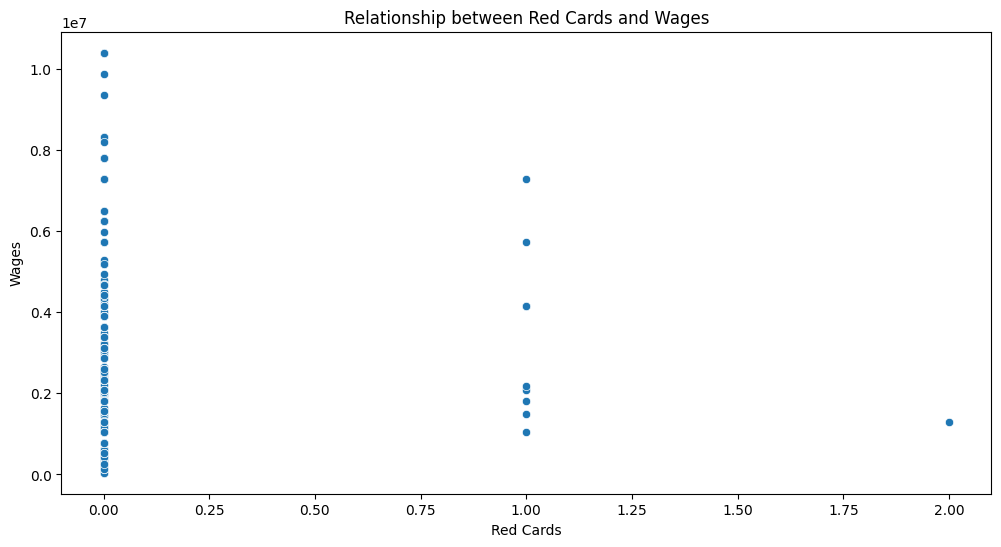

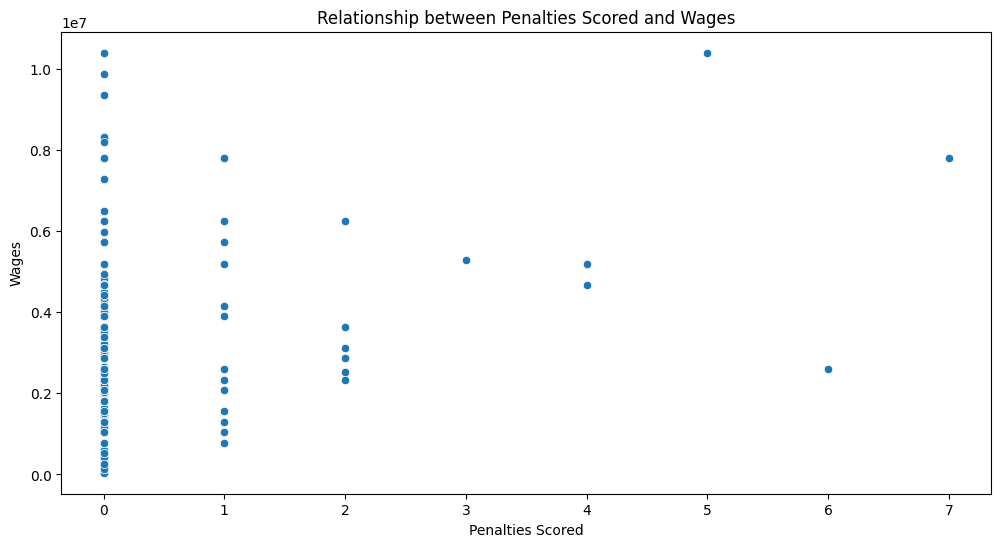

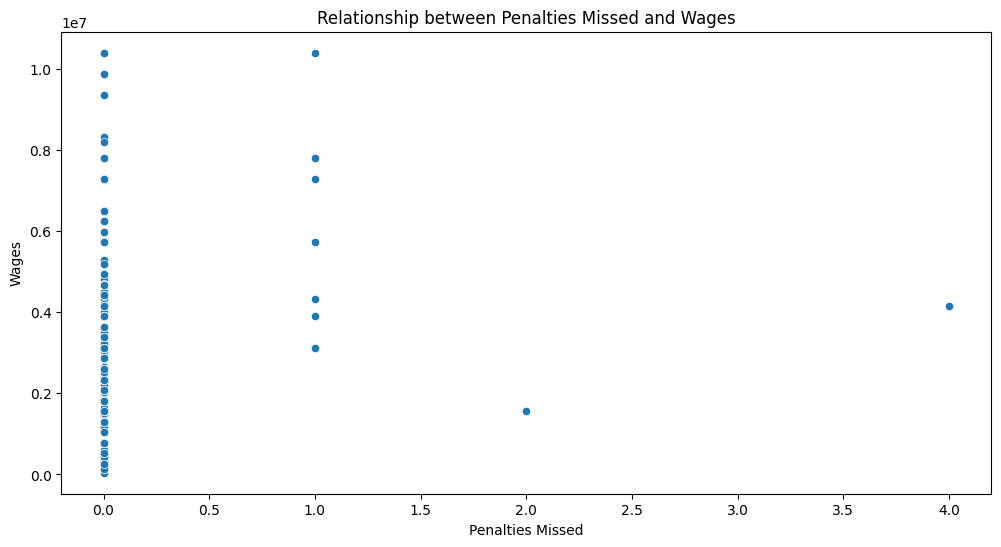

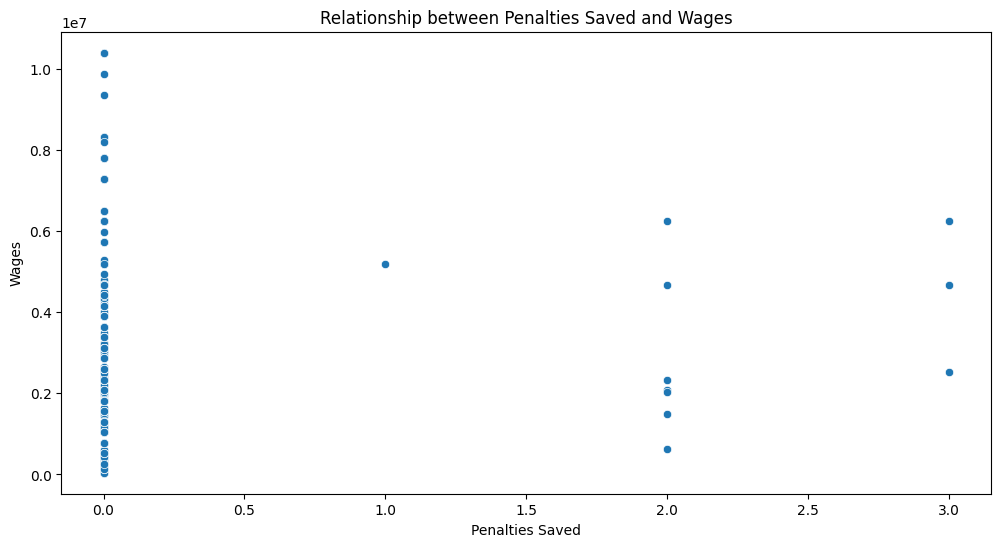

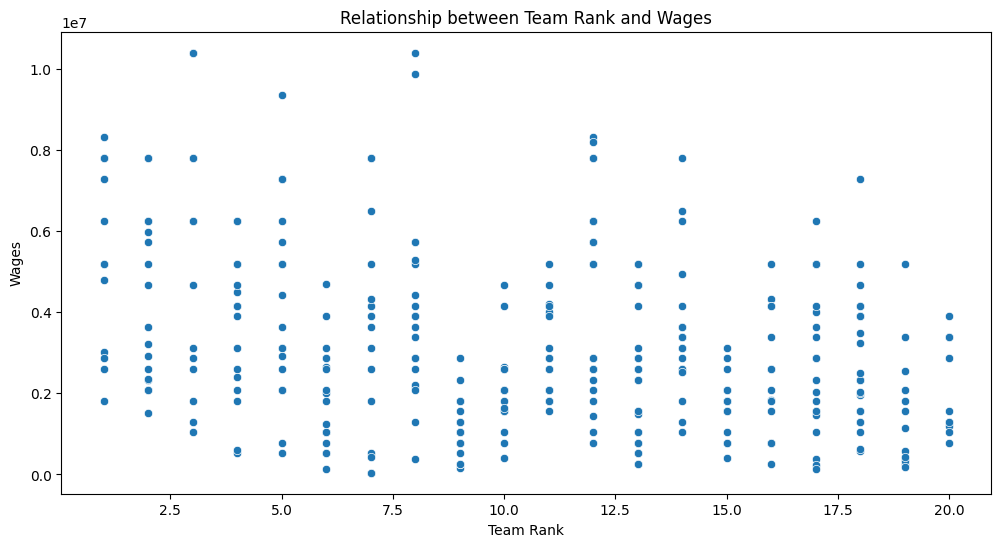

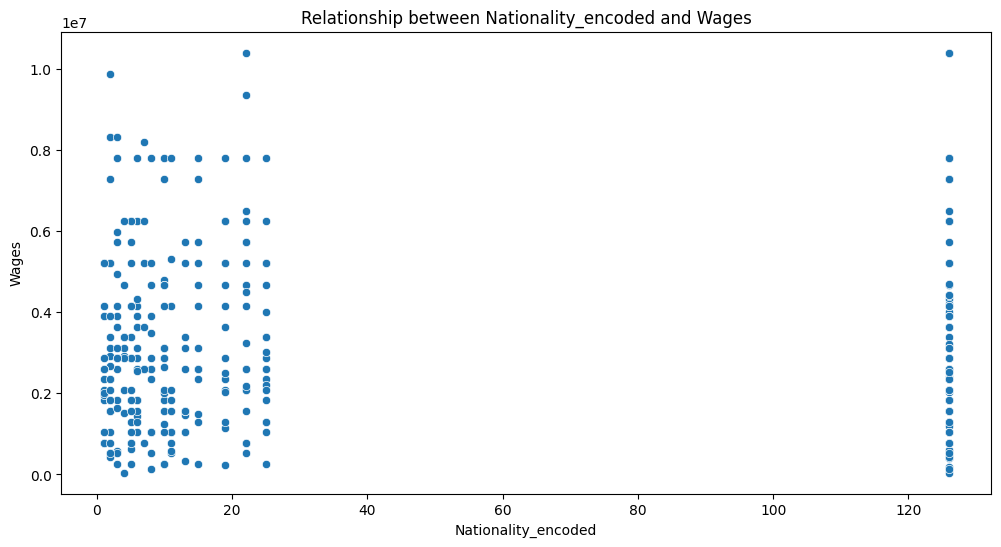

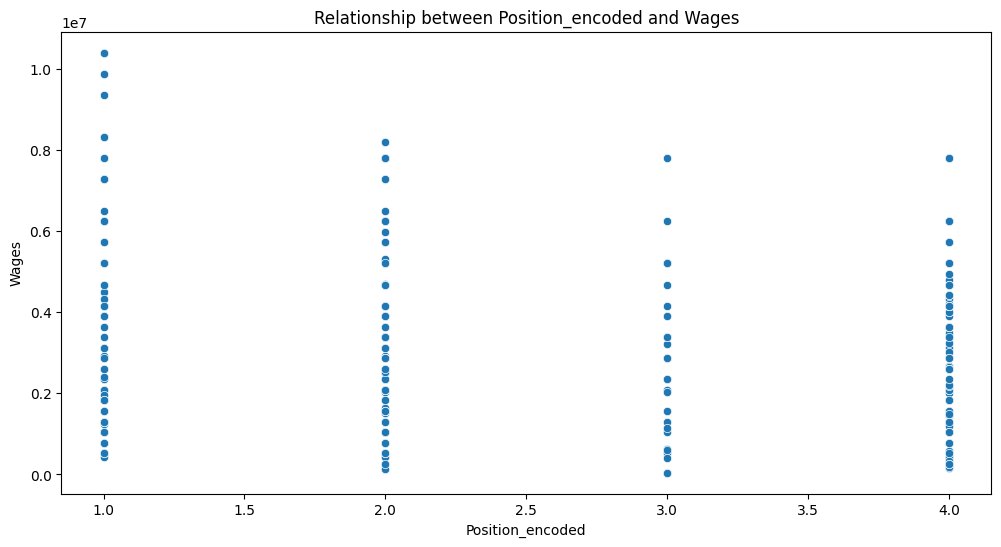

In [105]:
# Plotting scatter plots for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x=data[col], y=data['Wages'])
    plt.title(f'Relationship between {col} and Wages')
    plt.show()

Imputing the '0' values in the height and weight column with the mean of those respective columns

In [106]:
# Calculate the mean for 'Weight' and 'Height' columns without considering 0 values
weight_mean = data[data['Weight'] != 0]['Weight'].mean()
height_mean = data[data['Height'] != 0]['Height'].mean()

In [107]:
# Replace 0 values with the mean
data['Weight'] = data['Weight'].replace(0, weight_mean)
data['Height'] = data['Height'].replace(0, height_mean)

In [108]:
# Check for zero values in 'Weight' and 'Height' columns
has_zero_in_weight = (data['Weight'] == 0).any()
has_zero_in_height = (data['Height'] == 0).any()

In [109]:
print(f"Zero values in 'Weight' column: {has_zero_in_weight}")
print(f"Zero values in 'Height' column: {has_zero_in_height}")

Zero values in 'Weight' column: False
Zero values in 'Height' column: False


In [110]:
data.columns

Index(['First Name', 'Last Name', 'Age', 'Wages', 'Nationality', 'Height',
       'Weight', 'Team Name', 'League', 'Appearances', 'Lineups', 'Minutes',
       'Rating', 'In', 'Out', 'Bench', 'Total Shots', 'On Target Shots',
       'Total Goals', 'Conceded Goals', 'Assists', 'Saves', 'Total Passes',
       'Key Passes', 'Pass Accuracy', 'Total Tackles', 'Blocks',
       'Interceptions', 'Total Duels', 'Duels Won', 'Dribble Attempts',
       'Dribble Success', 'Fouls Drawn', 'Fouls Committed', 'Yellow Cards',
       'Red Cards', 'Penalties Scored', 'Penalties Missed', 'Penalties Saved',
       'Full Name', 'Team Rank', 'Nationality_encoded', 'Position_encoded'],
      dtype='object')

In [111]:
# Drop all the irrelevant categorical variables
data = data.drop(['Full Name', 'League', 'First Name', 'Last Name', 'Nationality'], axis='columns')

# Feature Creation

In [112]:
# Obtaining the overall value of each club in the league
Club_value = {
    'Manchester City': 4000000000,
    'Arsenal': 1800000000,
    'Manchester United': 4800000000,
    'Newcastle': 640000000,
    'Liverpool': 4200000000,
    'Brighton': 190000000,
    'Aston Villa': 609000000,
    'Tottenham': 2200000000,
    'Brentford': 160000000,
    'Fulham': 210000000,
    'Crystal Palace': 650000000,
    'Chelsea': 2500000000,
    'Wolves': 235000000,
    'West Ham': 831000000,
    'Bournemouth': 115000000,
    'Nottingham Forest': 130000000,
    'Everton': 600000000,
    'Leicester': 440000000,
    'Leeds': 305000000,
    'Southampton': 220000000
}

In [113]:
# Create a new column 'Club_value' with the encoded values
data['Club Value'] = data['Team Name'].map(Club_value)

In [114]:
data = data.drop('Team Name', axis='columns')

Correlation Analysis

We need to be careful about multicollinearity as whenever the independent features are internally correlated with each other, it hampers the accuracy of the model because the individual contribution of the features cannot be obtained.

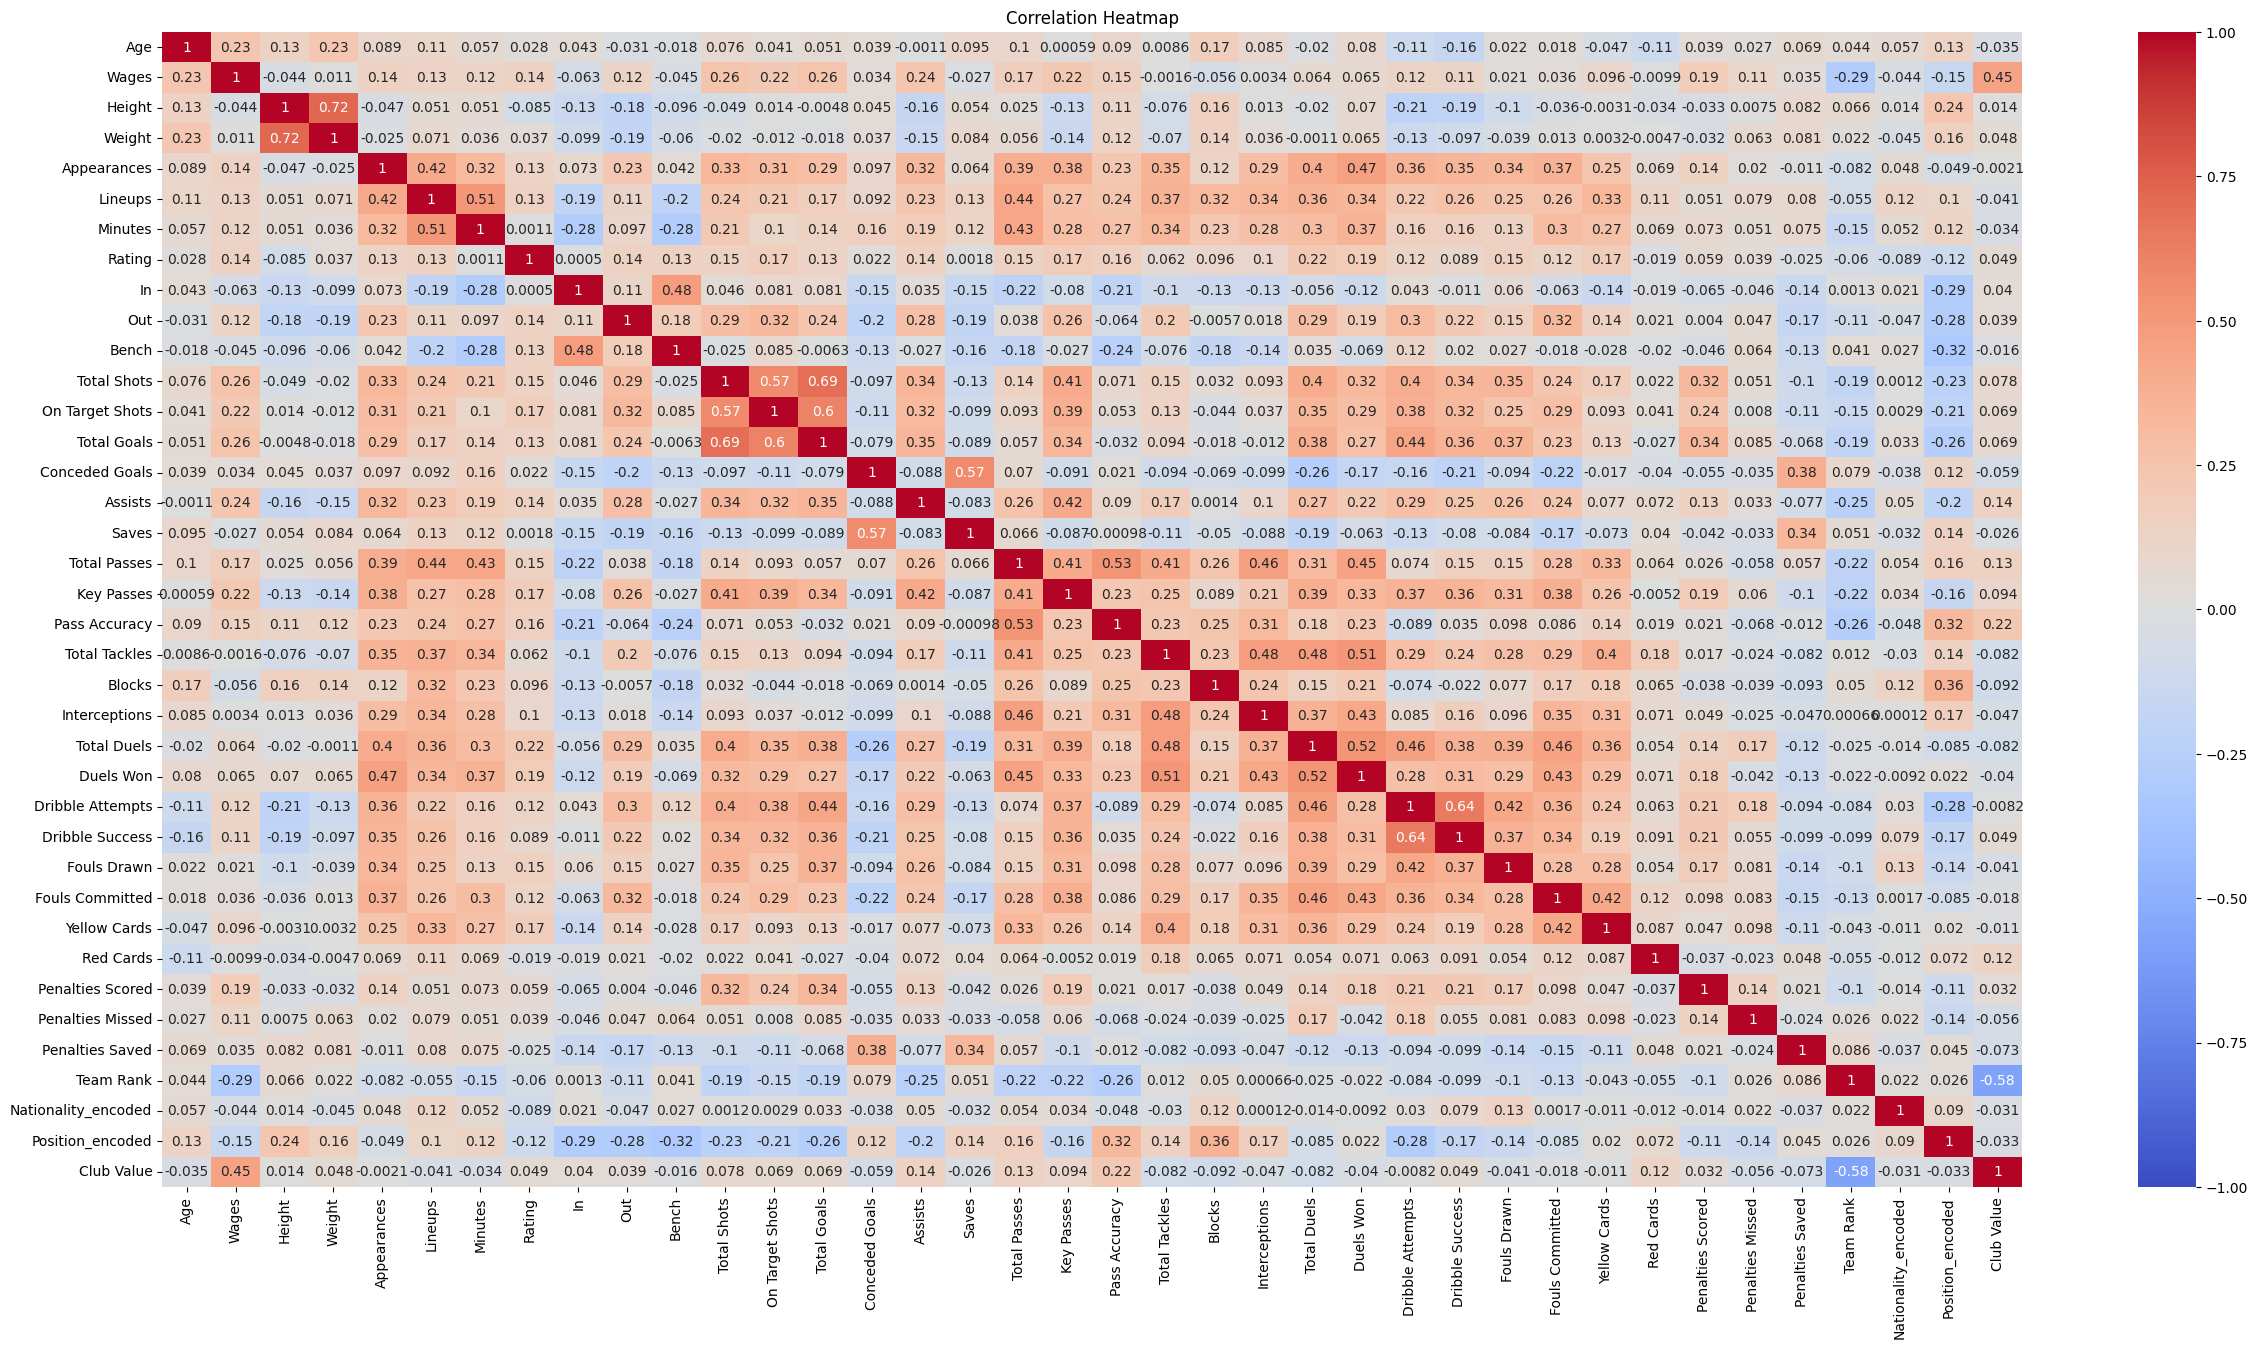

In [115]:
plt.figure(figsize=(30, 15))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

From the matrix we can see that height and weight, total shots with total goals and Dribble success with dribble attempts have a high correlation above 0.55 hence we can consider removing one of those features in the pair as it may lead to multicollinearity

In [116]:
data = data.drop(['Height','On Target Shots', 'Dribble Success'], axis='columns')

In [117]:
data.head()

Age    Wages  Weight  Appearances  Lineups  Minutes    Rating  In  Out   
0   22  3640000    72.0           20        9     3194  6.610714   1    1  \
1   29  2340000    61.0           14       16      929  7.020000  10   11   
2   22  4680000    75.0           36       34      427  7.158333   2    2   
3   24  5200000    72.0           16       10     1069  7.020000  21    9   
4   23   520000    70.0            0        0     1233  0.000000   2    5   

   Bench  ...  Fouls Committed  Yellow Cards  Red Cards  Penalties Scored   
0     21  ...               43             6          0                 2  \
1      0  ...                9             0          0                 0   
2      2  ...               39             3          0                 0   
3     10  ...               30             3          0                 0   
4      9  ...               11             1          0                 0   

   Penalties Missed  Penalties Saved  Team Rank  Nationality_encoded   
0                 0                0          2                  126  \
1                 0                0          2                    8   
2                 0                0          2                   22   
3                 0                0          2                  126   
4                 0                0          7                   22   

   Position_encoded  Club Value  
0                 1  1800000000  
1                 1  1800000000  
2                 1  1800000000  
3                 1  1800000000  
4                 1   609000000  

[5 rows x 35 columns]

We'll also create a feature combining the goals and assists as they are important for a player to measure their attacking output across a season

In [118]:
data['G+A'] = data['Total Goals'] + data['Assists']

# Feature Selection

Here we will use Multivariate Selection with SelectKBest which uses statistical tests to select features with the strongest relationship with the target variable.

In [119]:
# Seperate the features and the target variable
X = data.drop('Wages', axis='columns')
y = data['Wages']

In [120]:
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split

In [121]:
# feature selection
def select_features(X_train, y_train, X_test):
 # configure to select all features
 fs = SelectKBest(score_func=f_regression, k=27)
 # learn relationship from training data
 fs.fit(X_train, y_train)
 # transform train input data
 X_train_fs = fs.transform(X_train)
 # transform test input data
 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs, fs

In [122]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [123]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

Feature 0: 14.979116
Feature 1: 0.000811
Feature 2: 4.732015
Feature 3: 5.854047
Feature 4: 5.507793
Feature 5: 3.350638
Feature 6: 0.999512
Feature 7: 3.734632
Feature 8: 0.566764
Feature 9: 28.768426
Feature 10: 30.247844
Feature 11: 0.223222
Feature 12: 20.561550
Feature 13: 0.424192
Feature 14: 10.897279
Feature 15: 19.332556
Feature 16: 4.422535
Feature 17: 0.123350
Feature 18: 0.390382
Feature 19: 0.008135
Feature 20: 1.580078
Feature 21: 0.709503
Feature 22: 6.852257
Feature 23: 1.002006
Feature 24: 0.833298
Feature 25: 3.073692
Feature 26: 0.016710
Feature 27: 11.451123
Feature 28: 3.613775
Feature 29: 0.651440
Feature 30: 25.833601
Feature 31: 1.968552
Feature 32: 6.311332
Feature 33: 57.132652
Feature 34: 40.508588


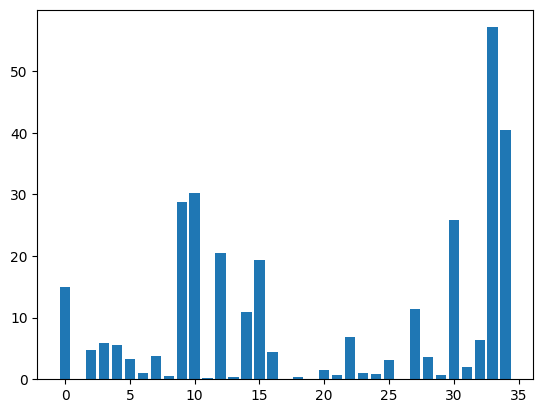

In [124]:
# what are scores for the features
for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [125]:
print(f"Average score of our features is : {np.mean(fs.scores_)}")

Average score of our features is : 9.047525793265512


Now in an attempt to further boost our model performance we will drop the features which have a score less than the average of all our scores

In [126]:
# Threshold for feature selection
threshold = np.mean(fs.scores_)

# Get the indices of the features that meet the threshold
selected_features = [i for i, score in enumerate(fs.scores_) if score > threshold]

In [127]:
# Selecting the desired features from the original dataset
X_train_selected = X_train.iloc[:, selected_features]
X_test_selected = X_test.iloc[:, selected_features]

In [128]:
# If you want the names of these features:
selected_feature_names = X.columns[selected_features]
print("Selected Features:")
print(selected_feature_names)

Selected Features:
Index(['Age', 'Total Shots', 'Total Goals', 'Assists', 'Total Passes',
       'Key Passes', 'Penalties Scored', 'Team Rank', 'Club Value', 'G+A'],
      dtype='object')


In [129]:
X_train_selected.shape

(284, 10)

# Model Testing and Evaluation

In [130]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error, r2_score

ModuleNotFoundError: No module named 'tensorflow'

Linear Regression

In [ ]:
# Linear Regression
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_train_selected, y_train)
y_pred_lin = lin_reg.predict(X_test_selected)
mse = mean_squared_error(y_test, y_pred_lin)
rmse = np.sqrt(mse)

In [ ]:
print("Linear Regression")
print("RMSE:", rmse)
print("R^2:", r2_score(y_test, y_pred_lin))
print("---------")

Linear Regression
RMSE: 1719045.6083394643
R^2: 0.31204328903952283
---------


Random Forest Regression

In [ ]:
# Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=0)
rf_reg.fit(X_train_selected, y_train)
y_pred_rf = rf_reg.predict(X_test_selected)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

In [ ]:
print("Random Forest Regressor")
print("RMSE:", rmse_rf)
print("R^2:", r2_score(y_test, y_pred_rf))
print("---------")

Random Forest Regressor
RMSE: 1702690.53568355
R^2: 0.325071515776473
---------


Gradient Boosting Regression

In [ ]:
# Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)
gb_reg.fit(X_train_selected, y_train)
y_pred_gb = gb_reg.predict(X_test_selected)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)

In [ ]:
print("Gradient Boosting Regressor")
print("RMSE:", rmse_gb)
print("R^2:", r2_score(y_test, y_pred_gb))
print("---------")

Gradient Boosting Regressor
RMSE: 1740927.7628123502
R^2: 0.2944174764116029
---------


Neural Network

In [ ]:
# Neural Network
nn = MLPRegressor(hidden_layer_sizes=(50, 50), activation='relu', solver='adam', max_iter=1000)
nn.fit(X_train_selected, y_train)
y_pred_nn = nn.predict(X_test_selected)
mse_NN = mean_squared_error(y_test, y_pred_nn)
rmse_NN = np.sqrt(mse_NN)

In [ ]:
print("Neural Network (MLPRegressor)")
print("RMSE:", rmse_NN)
print("R^2:", r2_score(y_test, y_pred_nn))
print("---------")

Neural Network (MLPRegressor)
RMSE: 2245176.645444865
R^2: -0.1735114871225767
---------
